In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import dython as dy # for nominal categorical data
from dython.nominal import associations 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os 
import taxi_survey 
from imp import reload
reload(taxi_survey)
from taxi_survey import *
from mord import LogisticIT
from mord import OrdinalRidge
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_56706/2424317827.py:18: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [2]:
df_raw = pd.read_excel("Electric Taxis in South Africa(1-5000).xlsx")
df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))
df = df_raw.copy()
df.drop(df.columns[0:7], axis = 1, inplace = True)
df
driver_owner_user = df['Please select the option that applies to you:']
demographics = df.columns[0:6]
education = df.columns[6:10]
driver_owner_user = df['Please select the option that applies to you:'] # Question 10 
driver_questions=  df.columns[11:22]
owner_questions = df.columns[22:35]
owner_driver_questions = df.columns[35:47]
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver_e_taxi_better_than_ICE = df[driver_questions[10]]
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
owner_driver_e_taxi_benefit = user_questions[7]
owner_driver_e_taxi_risks = user_questions[8]
owner_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_56706/1222642071.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))


In [5]:
EV_taxi_range.value_counts().sum()

5212

# Exploring perceptions related to EVs
Perception of benefits vs perception of risks <br>
Perception of risks vs risk profile <br>
Concern for climate change vs. perception of benefits <br>
Effect of 'age','income', 'education' on 'having an electric taxi would benefit your business', 'which one would cost more to run', 'which one would cost more to buy', 'which one would have more service costs', and 'concern for climate change' <br>


Define 'perceptions' target variables 

In [159]:
driver_perceptions = driver_questions[8:11]
print(driver_perceptions)
owner_perceptions = owner_questions[-6:]
print(owner_perceptions)
owner_driver_perceptions = owner_driver_questions[-7:]
print(owner_driver_perceptions)

Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)',
       'What risks would an electric taxi inroduce to your operations compared to petrol/diesel taxis? (select all that apply)',
       'Driving an electric taxi would be better for you than driving a petrol/diesel taxi'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)2',
       'What risks would an electric taxi inroduce to your operations compared to a petrol/diesel taxi? (select all that apply)',
       'Having an electric taxi would benefit your business.',
       'Which one would cost more to run the taxi per day?',
       'Which one would cost more to buy?',
       'Which one would have more service costs?'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)3',
       'What risks would

Create various indeces for categorical variables

In [ ]:
df['education_index'] = df[education[0]].map({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                 'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})

# risk, stated preferences, etc.

### Driver vs. Owner vs. User perceptions of benefits and risks

Benefits

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/2665902617.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


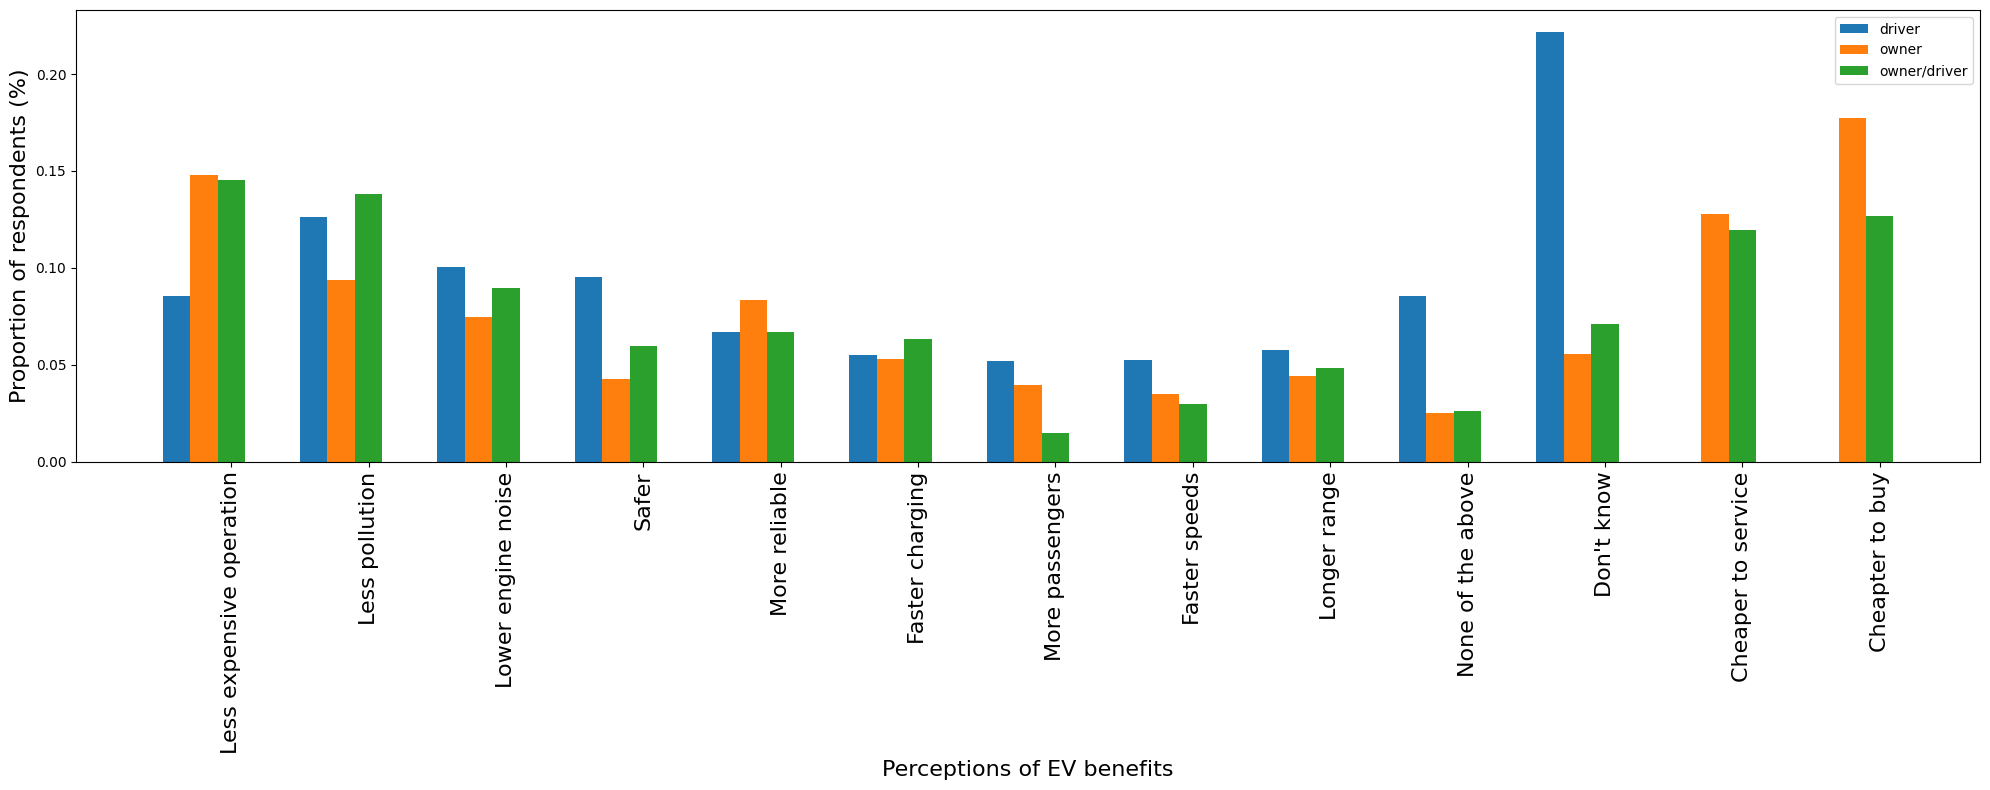

In [483]:
perceptions_driver = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_owner = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster charging an electric taxi than filling with diesel/petrol',  'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know", 'Cheaper to service', 'Cheaper to buy']
perceptions_od = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster charging an electric taxi than filling with diesel/petrol', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know", 'Cheaper to service', 'Cheaper to buy']

perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know", 'Cheaper to service', 'Cheapter to buy']


#### Exploding df to get unique answers and cleaning null/empty values ####
# Driver perceptions
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]

# Owner perceptions 
df['owner_benefits_of_etaxi_exploded'] = df[owner_perceptions[0]].str.split(';')
exploded_df_owner = df.explode('owner_benefits_of_etaxi_exploded')
exploded_df_owner = exploded_df_owner[(exploded_df_owner['owner_benefits_of_etaxi_exploded'] != '') & (exploded_df_owner['owner_benefits_of_etaxi_exploded'].notnull())]

# Driver + Owner perceptions 
df['owner_driver_benefits_of_etaxi_exploded'] = df[owner_driver_perceptions[0]].str.split(';')
exploded_df_owner_driver = df.explode('owner_driver_benefits_of_etaxi_exploded')
exploded_df_owner_driver = exploded_df_owner_driver[(exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'].notnull())]

# Creating dictionaries for plotting 
driver_benefits_dict = exploded_df_driver['driver_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions_driver).to_dict()
owner_benefits_dict = exploded_df_owner['owner_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions_owner).to_dict()
owner_driver_benefits_dict = exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions_od).to_dict()

# Matching up driver response vector to be same length as that of owner and owner/driver 
driver_benefits_dict['Cheaper to service'] = 0
driver_benefits_dict['Cheaper to buy'] = 0


# Creating one dictionary for all the response values for the three different categories to loop over
benefits_dict = {"driver": [val/sum(list(driver_benefits_dict.values())) for val in list(driver_benefits_dict.values())], 
           "owner": [val/sum(list(owner_benefits_dict.values())) for val in list(owner_benefits_dict.values())],
           'owner/driver': [val/sum(list(owner_driver_benefits_dict.values())) for val in list(owner_driver_benefits_dict.values())]}

width = 0.2
x = np.arange(len(perceptions_index))
fig, ax = plt.subplots(layout = 'constrained', figsize = (20, 8))
for respondent, response_counts in benefits_dict.items():
    offset= width * multiplier
    rects = ax.bar(x + offset, response_counts, width, label = respondent)
    multiplier += 1

axis_font_size = 16
ax.set_ylabel('Proportion of respondents (%)', fontsize = axis_font_size)
ax.set_xlabel('Perceptions of EV benefits', fontsize = axis_font_size)
ax.set_xticks(x + offset, labels=perceptions_index, rotation = 90, fontsize = axis_font_size)
ax.legend()
plt.tight_layout()
plt.savefig('figures/dou_benefits_of_etaxi_side_by_side.png')
plt.show()
    
# fig, axs = plt.subplots(1, 3, figsize = (20, 8))
# fig.subplots_adjust(wspace = 0.3)
# #PLOTTING
# x_font_size = 14 #
# ax=exploded_df_driver['driver_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions).plot(kind='bar', stacked=True, ax=axs[0], title='Driver Perceptions of EV benefits', color = 'blue', ylabel = 'Count')
# ax.set_xticklabels(perceptions_index, fontsize = x_font_size)

# ax=exploded_df_owner['owner_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions).plot(kind='bar', stacked=True, ax=axs[1], title='Owner Perceptions of EV benefits', color = 'red', ylabel = 'Count')
# ax.set_xticklabels(perceptions_index, fontsize = x_font_size)

# ax=exploded_df_owner_driver['owner_driver_benefits_of_etaxi_exploded'].value_counts().reindex(perceptions).plot(kind='bar', stacked=True, ax=axs[2], title='Driver/Owner Perceptions of EV benefits', color = 'purple', ylabel = 'Count')
# ax.set_xticklabels(perceptions_index, fontsize = x_font_size)

# plt.tight_layout()
# plt.savefig('figures/dou_ev_benefits_perceptions_comparison.png')
# plt.show()

Risks

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/1955643318.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


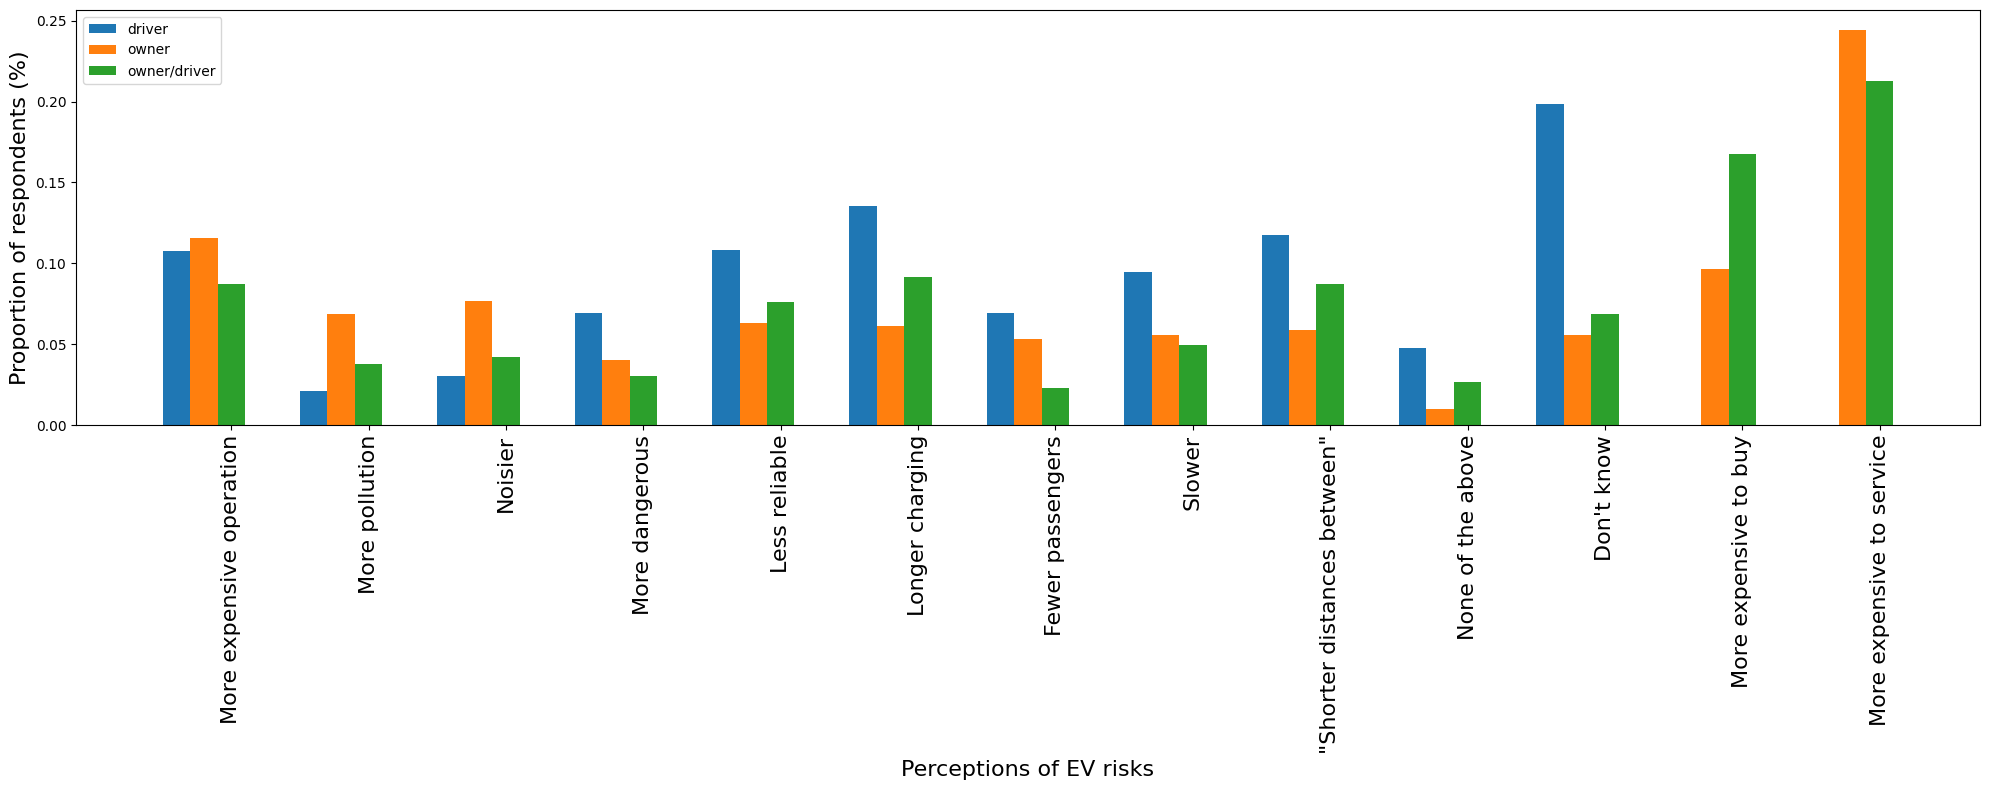

In [466]:
perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
perceptions_owner = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers than petrol/diesel taxis','Slower speeds',  'Shorter distances between charging',   'None of the above', "Don't know", 'Electric taxis are more expensive to service', 'Electric taxis are more expensive to buy']
perceptions_od = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between charging',   'None of the above', "Don't know", 'More expensive to service', 'More expensive to buy']

perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', '"Shorter distances between"', 'None of the above', "Don't know", 'More expensive to buy', 'More expensive to service']




# Driver perceptions
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode('driver_risks_of_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]

# Owner perceptions 
df['owner_risks_of_etaxi_exploded'] = df[owner_perceptions[1]].str.split(';')
exploded_df_owner = df.explode('owner_risks_of_etaxi_exploded')
exploded_df_owner = exploded_df_owner[(exploded_df_owner['owner_risks_of_etaxi_exploded'] != '') & (exploded_df_owner['owner_risks_of_etaxi_exploded'].notnull())]

# Driver + Owner perceptions 
df['owner_driver_risks_of_etaxi_exploded'] = df[owner_driver_perceptions[1]].str.split(';')
exploded_df_owner_driver = df.explode('owner_driver_risks_of_etaxi_exploded')
exploded_df_owner_driver = exploded_df_owner_driver[(exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'] != '') & (exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'].notnull())]


# Creating dictionaries for plotting 
driver_risks_dict = exploded_df_driver['driver_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).to_dict()
owner_risks_dict = exploded_df_owner['owner_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_owner).to_dict()
owner_driver_risks_dict = exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_od).to_dict()

# Matching up driver response vector to be same length as that of owner and owner/driver 
driver_risks_dict['More expensive to service'] = 0
driver_risks_dict['More expensive to buy'] = 0


# Creating one dictionary for all the response values for the three different categories to loop over
risks_dict = {"driver": [val/sum(list(driver_risks_dict.values())) for val in list(driver_risks_dict.values())], 
           "owner": [val/sum(list(owner_risks_dict.values())) for val in list(owner_risks_dict.values())],
           'owner/driver': [val/sum(list(owner_driver_risks_dict.values())) for val in list(owner_driver_risks_dict.values())]}

width = 0.2
x = np.arange(len(perceptions_index))
fig, ax = plt.subplots(layout = 'constrained', figsize = (20, 8))
for respondent, response_counts in risks_dict.items():
    offset= width * multiplier
    rects = ax.bar(x + offset, response_counts, width, label = respondent)
    multiplier += 1
    
    
# PLOTTING 

axis_font_size = 16
ax.set_ylabel('Proportion of respondents (%)', fontsize = axis_font_size)
ax.set_xlabel('Perceptions of EV risks', fontsize = axis_font_size)
ax.set_xticks(x + offset, labels=perceptions_risks_index, rotation = 90, fontsize = axis_font_size)
ax.legend()
plt.tight_layout()
plt.savefig('figures/dou_risks_of_etaxi_side_by_side.png')
plt.show()
# ax = exploded_df_driver['driver_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).plot(kind='bar', stacked=True, ax=axs[0], title='Driver Perceptions of EV risks', color = 'blue', ylabel = 'Count')
# ax.set_xticklabels(perceptions_risks_index, fontsize = x_font_size)

# ax = exploded_df_owner['owner_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).plot(kind='bar', stacked=True, ax=axs[1], title='Owner Perceptions of EV risks', color = 'red', ylabel = 'Count')
# ax.set_xticklabels(perceptions_risks_index, fontsize = x_font_size)

# ax = exploded_df_owner_driver['owner_driver_risks_of_etaxi_exploded'].value_counts().reindex(perceptions_risks).plot(kind='bar', stacked=True, ax=axs[2], title='Driver/Owner Perceptions of EV risks', color = 'purple', ylabel = 'Count')
# ax.set_xticklabels(perceptions_risks_index, fontsize = x_font_size)

# plt.tight_layout()
# plt.savefig('figures/dou_ev_risks_perceptions_comparison.png')
# plt.show()

### Stated Preferences

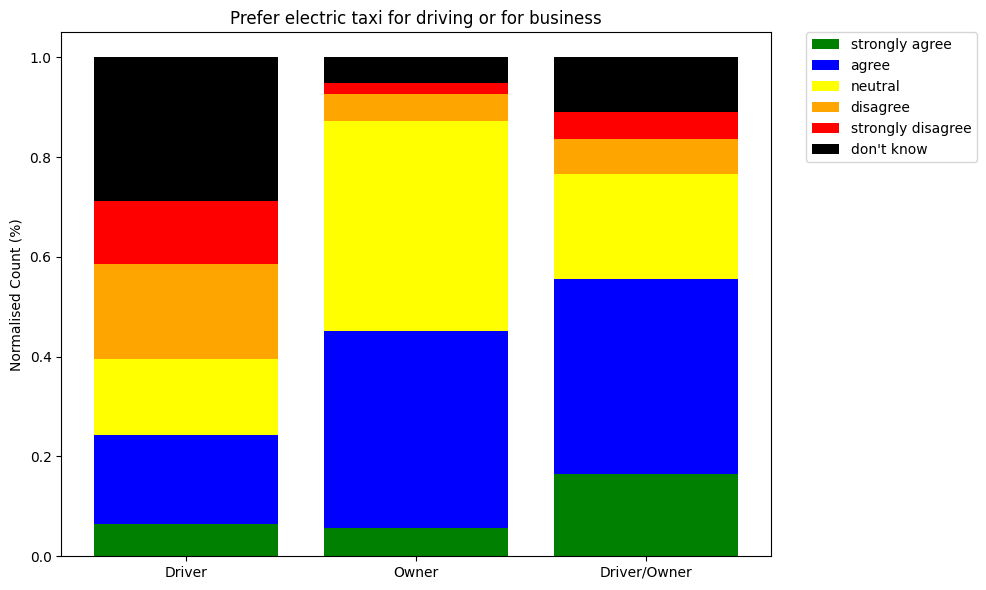

In [477]:
driver_is_it_better = df[driver_questions[-1]].value_counts(normalize=True)
owner_is_it_better = df[owner_questions[-4]].value_counts(normalize=True)
owner_driver_is_it_better = df[owner_driver_questions[-4]].value_counts(normalize=True)

driver_is_it_better.index = driver_is_it_better.index.str.lower()
owner_is_it_better.index = owner_is_it_better.index.str.lower()
owner_driver_is_it_better.index = owner_driver_is_it_better.index.str.lower()

colors = ['green', 'blue', 'yellow', 'orange', 'red', 'black']

reload(taxi_survey) 
taxi_survey.plot_pref_ev_comparison_among_groups(driver_is_it_better, owner_is_it_better, owner_driver_is_it_better, colors)


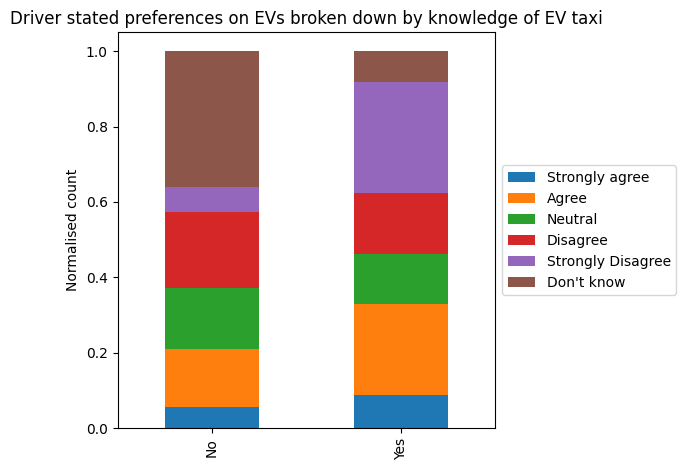

\begin{tabular}{lrrr}
\toprule
ev\_prefs\_index &      -1.0 &       0.0 &      1.0 \\
Do you know what an electric taxi is &           &           &          \\
\midrule
No                                   &  0.417117 &  0.252703 &  0.33018 \\
Yes                                  &  0.496522 &  0.143478 &  0.36000 \\
\bottomrule
\end{tabular}



/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/3304071270.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.crosstab(df[driver_questions[-4]], df['ev_prefs_index'], normalize = 'index').to_latex())


In [476]:
# STATED PREFS
order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree', "Don't know"]
pd.crosstab(df[driver_questions[-4]], df[driver_perceptions[2]], normalize = 'index')[order].plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Count', title = 'Driver stated preferences on EVs broken down by knowledge of EV taxi')
plt.xlabel('')
plt.ylabel('Normalised count')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
#plt.savefig("figures/drivers_knowledge_of_e_taxi_by_stated_prefs.png")
plt.show()
df['ev_prefs_index'] = df[driver_perceptions[2]].map({'Strongly agree': 1, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly Disagree': -1})
print(pd.crosstab(df[driver_questions[-4]], df['ev_prefs_index'], normalize = 'index').to_latex())

Find out how cost perceptions influence stated perceptions... 

### Knowledge of e-taxi vs. perceptions of e-taxi benefits and risk and stated prefs

In [ ]:
# Look at % who answered MORE correct than incorrect answers (have to index the answers correct and incorrect, and rhen binary indicator for if correct countn€min correct count)

# after do the KM grouped bar plot lol

# Look at % who answered MORE correct than incorrect answers (have to index the answers correct and incorrect, and rhen binary indicator for if correct countn€min correct count)

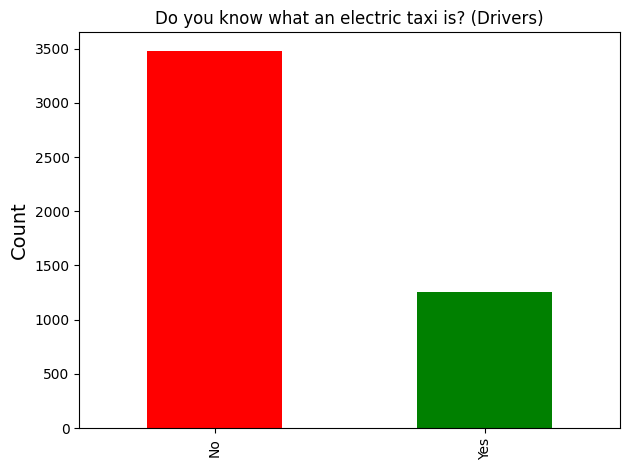

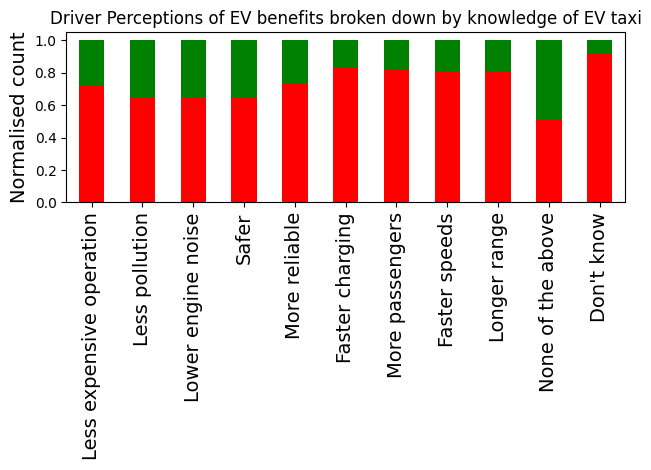

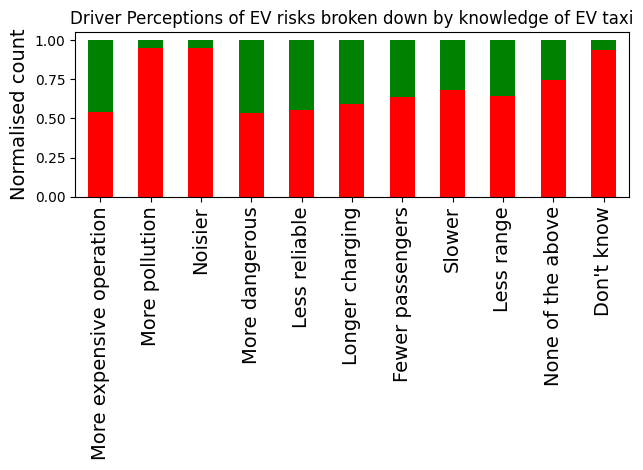

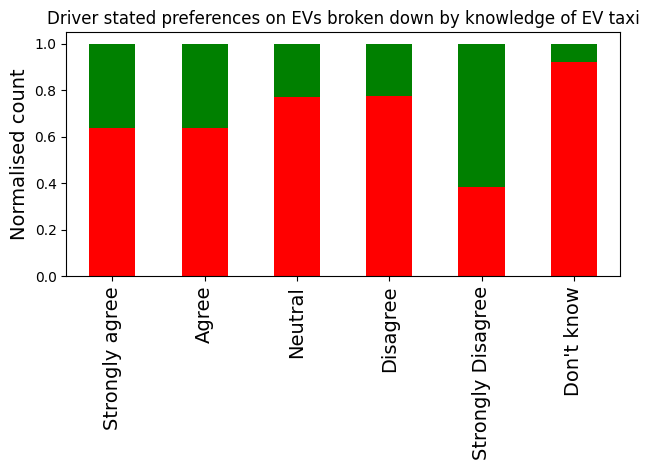

In [471]:
axis_font_size = 14
# 'do you know what an electric taxi is' for drivers
df[driver_questions[-4]].value_counts().plot(kind = 'bar', stacked = True, color = ['red', 'green'], ylabel = 'Count', title = 'Do you know what an electric taxi is? (Drivers)')
plt.xlabel('')
plt.ylabel('Count', fontsize = axis_font_size)
plt.tight_layout()
plt.savefig("figures/driver_knowledge_of_etaxi.png")
plt.show()

perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', 'Less range', 'None of the above', "Don't know"]


# BENEFITS
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver_benefits = df.explode('driver_benefits_of_etaxi_exploded', driver_questions[-4])
exploded_df_driver_benefits = exploded_df_driver_benefits[(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].notnull())]
pd.crosstab(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'], exploded_df_driver_benefits[driver_questions[-4]], normalize = 'index').reindex(perceptions).plot(kind = 'bar', legend = False,stacked = True, color = ['red', 'green'], ylabel = 'Count', title = 'Driver Perceptions of EV benefits broken down by knowledge of EV taxi')
plt.xlabel('')
plt.xticks(range(len(perceptions_index)), perceptions_index, rotation=90, fontsize = axis_font_size) # set the x-tick labels to the items in the perceptions list
plt.tight_layout()
plt.ylabel('Normalised count', fontsize = axis_font_size)
plt.savefig("figures/drivers_knowledge_of_e_taxi_by_benefits.png")
plt.show()

# RISKS
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver_risks = df.explode('driver_risks_of_etaxi_exploded', driver_questions[-4])
exploded_df_driver_risks = exploded_df_driver_risks[(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].notnull())]
pd.crosstab(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'], exploded_df_driver_risks[driver_questions[-4]], normalize = 'index').reindex(perceptions_risks).plot(kind = 'bar', legend = False,stacked = True, color = ['red', 'green'], ylabel = 'Count', title = 'Driver Perceptions of EV risks broken down by knowledge of EV taxi')
plt.xlabel('')
plt.xticks(range(len(perceptions_risks_index)), perceptions_risks_index, rotation=90, fontsize = axis_font_size) # set the x-tick labels to the items in the perceptions list
plt.ylabel('Normalised count', fontsize = axis_font_size)
plt.tight_layout()
plt.savefig("figures/drivers_knowledge_of_e_taxi_by_risks.png")
plt.show()

# STATED PREFS
order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree', "Don't know"]
pd.crosstab(df[driver_perceptions[2]], df[driver_questions[-4]], normalize = 'index').reindex(order).plot(kind = 'bar', stacked = True, legend = False, color = ['red', 'green'], ylabel = 'Count', title = 'Driver stated preferences on EVs broken down by knowledge of EV taxi')
plt.xticks(fontsize = axis_font_size)
plt.xlabel('')
plt.ylabel('Normalised count', fontsize = axis_font_size)
plt.tight_layout()
plt.savefig("figures/drivers_knowledge_of_e_taxi_by_stated_prefs.png")
plt.show()

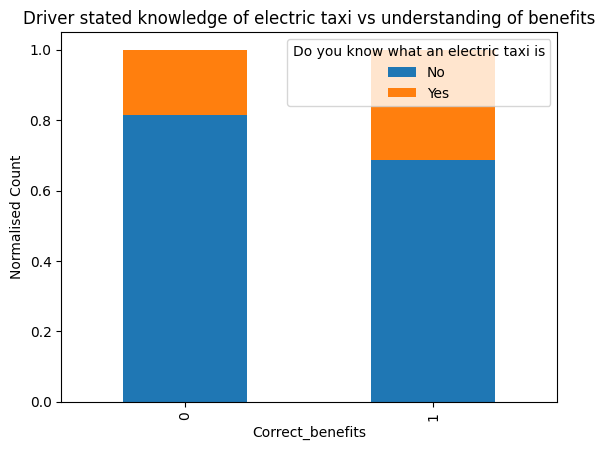

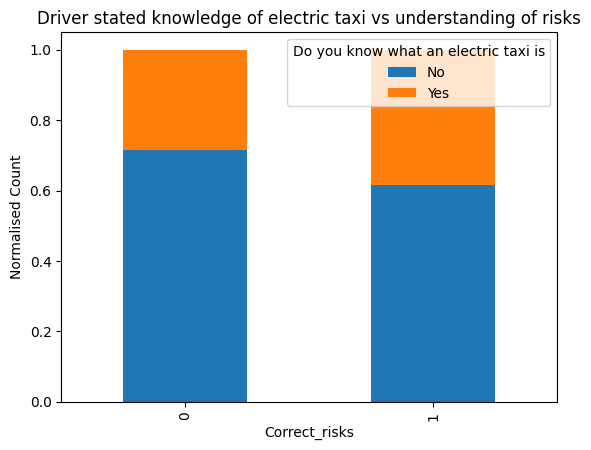

\begin{tabular}{lrr}
\toprule
Correct\_benefits &         0 &         1 \\
Do you know what an electric taxi is &           &           \\
\midrule
No                                   &  0.514710 &  0.485290 \\
Yes                                  &  0.347766 &  0.652234 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
Correct\_risks &         0 &         1 \\
Do you know what an electric taxi is &           &           \\
\midrule
No                                   &  0.774748 &  0.225252 \\
Yes                                  &  0.686531 &  0.313469 \\
\bottomrule
\end{tabular}



/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/3818240244.py:29: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.crosstab( exploded_df_driver_benefits[driver_questions[-4]], exploded_df_driver_benefits['Correct_benefits'],normalize = 'index').to_latex())
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/3818240244.py:30: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.crosstab(exploded_df_driver_risks[driver_questions[-4]], exp

In [484]:
# we kind of want this the other way around... given that a respondent knows what an electric taxi is, what is the probability that they give a correct answer to... 
# ... the benefits of an electric taxi
# ... the risks of an electric taxi
# ... their stated preference on electric taxis
perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]

benefits_correct_answers = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster speeds with']
exploded_df_driver_benefits['Correct_benefits'] = np.where(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].isin(benefits_correct_answers), 1, 0)
pd.crosstab(exploded_df_driver_benefits['Correct_benefits'], exploded_df_driver_benefits[driver_questions[-4]], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Normalised Count', title = 'Driver stated knowledge of electric taxi vs understanding of benefits' )
plt.show()


risks_correct_answers = ['Longer periods of charging an electric taxi than filling with diesel/petrol', 'Shorter distances between']
exploded_df_driver_risks['Correct_risks'] = np.where(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].isin(risks_correct_answers), 1, 0)
pd.crosstab(exploded_df_driver_risks['Correct_risks'], exploded_df_driver_risks[driver_questions[-4]], normalize = 'index').plot(kind = 'bar', stacked = True, legend = True, ylabel = 'Normalised Count', title = 'Driver stated knowledge of electric taxi vs understanding of risks' )
plt.show()
# check if any answered 'don't know' to benefits AND risks



# test if the means between the two groups is significantly different for understanding of benefits and risks and knowledge of e-taxi
exploded_df_driver_benefits.groupby(driver_questions[-4])['Correct_benefits'].mean()
# t-test
t_test = ttest_ind(exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'Yes']['Correct_benefits'], exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'No']['Correct_benefits'])
t_test
t_test = ttest_ind(exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'Yes']['Correct_risks'], exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'No']['Correct_risks'])
t_test

print(pd.crosstab( exploded_df_driver_benefits[driver_questions[-4]], exploded_df_driver_benefits['Correct_benefits'],normalize = 'index').to_latex())
print(pd.crosstab(exploded_df_driver_risks[driver_questions[-4]], exploded_df_driver_risks['Correct_risks'], normalize = 'index').to_latex())

Logistic regression with binary target variable of agree that taxi would be better or not and predictor feature of do you know what electric taxi is

In [293]:
df['ev_prefs_index'] = df[driver_perceptions[2]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly Disagree': 1})

df_clean = df.dropna(subset = ['ev_prefs_index', driver_questions[-4]])

df_clean['ev_prefs_index'] = df_clean['ev_prefs_index'].astype('int')

# Convert driver_questions[-4] into dummy variables
dummy = pd.get_dummies(df_clean[driver_questions[-4]], drop_first=True)

# Concatenate the dummy variables with the original dataframe
df_clean = pd.concat([df_clean, dummy], axis=1)

# Recode the target variable to be 1 if the response is 4 or 5 and 0 otherwise
df_clean['binary_ev_prefs_index'] = df_clean['ev_prefs_index'].apply(lambda x: 1 if x >= 4 else 0)

# Create a logistic regression model with the dummy variables as the independent variables and the new binary target variable as the dependent variable
logit_model = sm.Logit(df_clean['binary_ev_prefs_index'], df_clean[dummy.columns])

# Fit the model and print the summary
logit_result = logit_model.fit()
print(logit_result.summary())

# Suppose log odds is a vector of log odds values
log_odds = np.array(logit_result.params.values)

# Convert log odds to probabilities
probabilities = 1 / (1 + np.exp(-log_odds))

print(probabilities, np.exp(log_odds))



/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/1801643381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ev_prefs_index'] = df_clean['ev_prefs_index'].astype('int')
/Users/Orie4416/.local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.456613
         Iterations: 35


PerfectSeparationError: Perfect separation detected, results not available

In [267]:
# Extract the parameter estimates and their standard errors from the logit_result object
params = logit_result.params
cov_matrix = logit_result.cov_params()

# Calculate the standard error of the difference between the two coefficients
se_diff = np.sqrt(params['No']**2 * cov_matrix.loc['No','No'] + params['Yes']**2 * cov_matrix.loc['Yes','Yes'] - 2 * params['No'] * params['Yes'] * cov_matrix.loc['No','Yes'])

# Calculate the Wald statistic and p-value for the difference between the coefficients
wald_stat = (params['No'] - params['Yes']) / se_diff
p_val = 2 * (1 - stats.norm.cdf(abs(wald_stat)))

print("Wald statistic:", wald_stat)
print("P-value:", p_val)


Wald statistic: 3.6959332306506307
P-value: 0.0002190805484825198


Ordered logistic regression of knowledge of electric taxi on stated preferences for electric taxi

In [246]:
cats = CategoricalDtype(categories = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'], ordered = True)
df['ev_prefs_index'] = df[driver_perceptions[2]].astype(cats)
#df['education_index'] = df[education[0]].map({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                 # 'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                 # 'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                #  'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})
#one hot encoding on knowledge of ev taxi (driver_perceptions[-4])

df_clean = df.dropna(subset = ['ev_prefs_index', driver_questions[-4]])
#drop where ev prefs is don't know
#df_clean = df_clean[df_clean['ev_prefs_index'] != 0]

# Convert driver_questions[-4] into dummy variables
dummy = pd.get_dummies(df_clean[driver_questions[-4]])

# Concatenate the dummy variables with the original dataframe
df_clean = pd.concat([df_clean, dummy], axis=1)

# Fit an ordinal logistic regression model
ordinal_model = sm.discrete.discrete_model.MNLogit(df_clean['ev_prefs_index'], df_clean[dummy.columns])

ordinal_result = ordinal_model.fit()

# Print the summary of the model
ordinal_result.summary()

Optimization terminated successfully.
         Current function value: 1.510092
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         ev_prefs_index   No. Observations:                 3370
Model:                        MNLogit   Df Residuals:                     3362
Method:                           MLE   Df Model:                            4
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                 0.02782
Time:                        16:11:13   Log-Likelihood:                -5089.0
converged:                       True   LL-Null:                       -5234.6
Covariance Type:            nonrobust   LLR p-value:                 8.371e-62
====================================================================================================
            ev_prefs_index=Agree       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
No                                   1.0219      0.084     12.205      0.000       0.858       1.186
Yes                                  1.0165      0.111      9.136      0.000       0.798       1.235
----------------------------------------------------------------------------------------------------
ev_prefs_index=Neutral       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
No                         1.0619      0.083     12.749      0.000       0.899       1.225
Yes                        0.4055      0.123      3.294      0.001       0.164       0.647
------------------------------------------------------------------------------------------
ev_prefs_index=Disagree       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
No                          1.2804      0.081     15.775      0.000       1.121       1.439
Yes                         0.6176      0.118      5.221      0.000       0.386       0.849
-------------------------------------------------------------------------------------------
ev_prefs_index=Strongly Disagree       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
No                                   0.1615      0.098      1.653      0.098      -0.030       0.353
Yes                                  1.2049      0.109     11.084      0.000       0.992       1.418
====================================================================================================
"""

### Effect of cost perceptions, income, climate, risk appetite, education, and age on (UNDERSTANDS  BENEFITS, UNDERSTANDS RISKS, STATED PREFS)
Cost perceptions: Owners & Owner/Drivers, on STATED PREFS <br>
Income: All three<br>
Climate: Benefits, stated prefs<br>
Risk: Risks, stated prefs<br>
Education: All three<br>
Age: All three 

Effect of cost perception on [STATED PREFS]

In [522]:
# get 'correct' answers for cost questions (1,0)

df['correct_run_cost'] = np.where(df[owner_questions[-3]] == 'Electricity costs for charging', 0, 1) # INCORRECT if the respondent thinks that the RUNNING cost for EVs is higher 
df['correct_buy_cost'] = np.where(df[owner_questions[-2]] == 'Electric taxi', 1, 0) # CORRECT if the respondent thinks that the PURCHASE cost for EVs is higher
df['correct_service_cost'] = np.where(df[owner_questions[-1]] == 'Electric taxi', 0, 1) # INCORRECT if the respondent thinks that the SERVICE cost for EVs is higher

df['# of Cost Qs Correct'] = df['correct_run_cost'] + df['correct_buy_cost'] + df['correct_service_cost']

### compare to owner's stated prefs ###
# Reorder stated pref categories
order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', "Don't know"]
# Obtain crosstabulation 
round(pd.crosstab(df['correct_run_cost'],df[owner_questions[-4]], normalize = 'index'),2)[order]

print(round(100 * pd.crosstab(df['# of Cost Qs Correct'],df[owner_questions[-4]], normalize = 'index'),0)[order].to_latex()) # 0 = all incorrect, 1 = 1 correct, 2 = 2 correct, 3 = all correct, note that very few respondents actually got three right 

\begin{tabular}{lrrrrrr}
\toprule
Having an electric taxi would benefit your business. &  Strongly agree &  Agree &  Neutral &  Disagree &  Strongly disagree &  Don't know \\
\# of Cost Qs Correct &                 &        &          &           &                    &             \\
\midrule
0                    &             0.0 &   46.0 &     46.0 &       8.0 &                0.0 &         0.0 \\
1                    &             3.0 &   36.0 &     51.0 &       6.0 &                2.0 &         1.0 \\
2                    &            11.0 &   43.0 &     30.0 &       3.0 &                3.0 &        11.0 \\
3                    &             4.0 &   46.0 &     29.0 &       8.0 &                0.0 &        12.0 \\
\bottomrule
\end{tabular}



/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/4004432032.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(100 * pd.crosstab(df['# of Cost Qs Correct'],df[owner_questions[-4]], normalize = 'index'),0)[order].to_latex()) # 0 = all incorrect, 1 = 1 correct, 2 = 2 correct, 3 = all correct, note that very few respondents actually got three right


Regression, number of cost q's on stated prefs

In [604]:
df['prefs_mapped'] = df[owner_questions[-4]].map({'Strongly agree': 1, 'Agree': 1, 'Disagree': 0, 'Strongly disagree': 0})

# Run a regression of num_cost_qs correct on prefs_mapped
df = df.dropna(subset = ['prefs_mapped', '# of Cost Qs Correct'])
logit_model = sm.Logit( df['prefs_mapped'], df['# of Cost Qs Correct'])
logit_result = logit_model.fit()
print(logit_result.summary())

#interpret log odds coefficient as % increase in odds of agreeing with EVs if respondent gets one question correct
print(np.exp(logit_result.params.values))

#convert log odds to probability
probabilities = 1 / (1 + np.exp(logit_result.params.values))
print(probabilities)

Optimization terminated successfully.
         Current function value: 0.436016
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           prefs_mapped   No. Observations:                  187
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            0
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                -0.05613
Time:                        17:31:38   Log-Likelihood:                -81.535
converged:                       True   LL-Null:                       -77.202
Covariance Type:            nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
# of Cost Qs Correct     1.1272      0.147      7.669      0.000       0.839       1.415

Create exploded dataframes with binary indicator for correct and incorrect answers to understanding of EV benefits and risks

In [584]:
driver_perceptions[0]

'How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)'

In [585]:
##### BENEFITS #####

# Answer lists + correct answer lists
perceptions_owner_benefits = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster charging an electric taxi than filling with diesel/petrol',  'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know", 'Cheaper to service', 'Cheaper to buy']
perceptions_od_benefits = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster charging an electric taxi than filling with diesel/petrol', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know", 'Cheaper to service', 'Cheaper to buy']

benefits_correct_answers = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster speeds', 'Cheaper to service']
benefits_correct_answers_for_drivers = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable', 'Faster speeds']

# Create exploded DFs
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver_benefits = df.explode('driver_benefits_of_etaxi_exploded')
exploded_df_driver_benefits = exploded_df_driver_benefits[(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].notnull())]
exploded_df_driver_benefits['Correct_benefits'] = np.where(exploded_df_driver_benefits['driver_benefits_of_etaxi_exploded'].isin(benefits_correct_answers_for_drivers), 1, 0)


df['owner_benefits_of_etaxi_exploded'] = df[owner_perceptions[0]].str.split(';')
exploded_df_owner_benefits = df.explode('owner_benefits_of_etaxi_exploded')
exploded_df_owner_benefits = exploded_df_owner_benefits[(exploded_df_owner_benefits['owner_benefits_of_etaxi_exploded'] != '') & (exploded_df_owner_benefits['owner_benefits_of_etaxi_exploded'].notnull())]
exploded_df_owner_benefits['Correct_benefits'] = np.where(exploded_df_owner_benefits['owner_benefits_of_etaxi_exploded'].isin(benefits_correct_answers), 1, 0)


df['owner_driver_benefits_of_etaxi_exploded'] = df[owner_driver_questions[-7]].str.split(';')
exploded_df_owner_driver_benefits = df.explode('owner_driver_benefits_of_etaxi_exploded')
exploded_df_owner_driver_benefits = exploded_df_owner_driver_benefits[(exploded_df_owner_driver_benefits['owner_driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_owner_driver_benefits['owner_driver_benefits_of_etaxi_exploded'].notnull())]
exploded_df_owner_driver_benefits['Correct_benefits'] = np.where(exploded_df_owner_driver_benefits['owner_driver_benefits_of_etaxi_exploded'].isin(benefits_correct_answers), 1, 0)



##### RISKS #####

perceptions_owner_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers than petrol/diesel taxis','Slower speeds',  'Shorter distances between charging',   'None of the above', "Don't know", 'Electric taxis are more expensive to service', 'Electric taxis are more expensive to buy']
perceptions_od_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between charging',   'None of the above', "Don't know", 'More expensive to service', 'More expensive to buy']

risks_correct_answers = ['Longer periods of charging an electric taxi than filling with diesel/petrol', 'Shorter distances between charging', 'More expensive to buy']
risks_correct_answers_drivers = ['Longer periods of charging an electric taxi than filling with diesel/petrol', 'Shorter distances between charging']

# Create exploded DFs
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver_risks = df.explode('driver_risks_of_etaxi_exploded')
exploded_df_driver_risks = exploded_df_driver_risks[(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].notnull())]
exploded_df_driver_risks['Correct_risks'] = np.where(exploded_df_driver_risks['driver_risks_of_etaxi_exploded'].isin(risks_correct_answers_drivers), 1, 0)


df['owner_risks_of_etaxi_exploded'] = df[owner_perceptions[1]].str.split(';')
exploded_df_owner_risks = df.explode('owner_risks_of_etaxi_exploded')
exploded_df_owner_risks = exploded_df_owner_risks[(exploded_df_owner_risks['owner_risks_of_etaxi_exploded'] != '') & (exploded_df_owner_risks['owner_risks_of_etaxi_exploded'].notnull())]
exploded_df_owner_risks['Correct_risks'] = np.where(exploded_df_owner_risks['owner_risks_of_etaxi_exploded'].isin(risks_correct_answers), 1, 0)


df['owner_driver_risks_of_etaxi_exploded'] = df[owner_driver_questions[-6]].str.split(';')
exploded_df_owner_driver_risks = df.explode('owner_driver_risks_of_etaxi_exploded')
exploded_df_owner_driver_risks = exploded_df_owner_driver_risks[(exploded_df_owner_driver_risks['owner_driver_risks_of_etaxi_exploded'] != '') & (exploded_df_owner_driver_risks['owner_driver_risks_of_etaxi_exploded'].notnull())]
exploded_df_owner_driver_risks['Correct_risks'] = np.where(exploded_df_owner_driver_risks['owner_driver_risks_of_etaxi_exploded'].isin(risks_correct_answers), 1, 0)




# # test if the means between the two groups is significantly different for understanding of benefits and risks and knowledge of e-taxi
# exploded_df_driver_benefits.groupby(driver_questions[-4])['Correct_benefits'].mean()
# # t-test
# t_test = ttest_ind(exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'Yes']['Correct_benefits'], exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[-4]] == 'No']['Correct_benefits'])
# t_test
# t_test = ttest_ind(exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'Yes']['Correct_risks'], exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[-4]] == 'No']['Correct_risks'])
# t_test


Effect of Income on [BENEFITS, RISKS, STATED PREFS]

In [592]:
### MUST EITHER CREATRE INCOME BUCKETS OR DO A BOX AND WHISKER PLOT OR CONTINUOUS REGRESSION
### CAN DO THIS APPROACH FOR THE CATEGORICAL VARIABLES (NOT CONTINUOUS VARAIBLE LIKE INCOME)
#owner_df_exploded_benefits_cleaned_income = exploded_df_owner_benefits[owner_questions[6]].dropna()

##### OWNERS #####

# BENEFITS 
owner_df_exploded_benefits_cleaned_income = exploded_df_owner_benefits[exploded_df_owner_benefits[owner_questions[6]] < 5000]

#so that string can tokenize in regression
owner_df_exploded_benefits_cleaned_income['owner_income'] = owner_df_exploded_benefits_cleaned_income[owner_questions[6]]

# Logistic regression of income on understanding of benefits
logit = smf.logit(formula = 'Correct_benefits ~ owner_income', data = owner_df_exploded_benefits_cleaned_income)
logit_results = logit.fit()

# Print results to latex
logit_results.summary()

# RISKS

#so that string can tokenize in regression
owner_df_exploded_risks_cleaned_income = exploded_df_owner_risks[exploded_df_owner_risks[owner_questions[6]] < 5000]

owner_df_exploded_risks_cleaned_income['owner_income'] = owner_df_exploded_risks_cleaned_income[owner_questions[6]]

# Logistic regression of income on understanding of risks
logit = smf.logit(formula = 'Correct_risks ~ owner_income', data = owner_df_exploded_risks_cleaned_income)
logit_results = logit.fit()

# Print results to latex
print('Risks owners:', logit_results.summary())

# STATED PREFS - doesn't work yet 

#so that string can tokenize in regression
owner_df_exploded_prefs_cleaned_income = exploded_df_owner_prefs[exploded_df_owner_prefs[owner_questions[6]] < 5000]

owner_df_exploded_prefs_cleaned_income['owner_prefs'] = owner_df_exploded_prefs_cleaned_income[owner_questions[6]].map{"Strongly disagree": 0, "Disagree": 0, "Agree": 1, "Strongly Agree": 1}

# Logistic regression of income on understanding of prefs
logit = smf.logit(formula = 'Correct_prefs ~ owner_income', data = owner_df_exploded_prefs_cleaned_income)
logit_results = logit.fit()

# Print results to latex
print('Prefs owners:', logit_results.summary())


##### DRIVERS ##### 

# BENEFITS 

#so that string can tokenize in regression
driver_df_exploded_benefits_cleaned_income = exploded_df_driver_benefits[exploded_df_driver_benefits[driver_questions[6]] < 5000]

driver_df_exploded_benefits_cleaned_income['driver_income'] = driver_df_exploded_benefits_cleaned_income[driver_questions[6]]

# Logistic regression of income on understanding of benefits
logit = smf.logit(formula = 'Correct_benefits ~ driver_income', data = driver_df_exploded_benefits_cleaned_income)
logit_results = logit.fit()

# Print results to latex
logit_results.summary()

# RISKS
 
#so that string can tokenize in regression
driver_df_exploded_risks_cleaned_income = exploded_df_driver_risks[exploded_df_driver_risks[driver_questions[6]] < 5000]

driver_df_exploded_risks_cleaned_income['driver_income'] = driver_df_exploded_risks_cleaned_income[driver_questions[6]]

# Logistic regression of income on understanding of risks
logit = smf.logit(formula = 'Correct_risks ~ driver_income', data = driver_df_exploded_risks_cleaned_income)
logit_results = logit.fit()

# Print results to latex
print('Risks drivers:', logit_results.summary())



##### STATED PREFERENCES #####

 


/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/3984182370.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_df_exploded_benefits_cleaned_income['owner_income'] = owner_df_exploded_benefits_cleaned_income[owner_questions[6]]
/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/3984182370.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owner_df_exploded_risks_cleaned_income['owner_income'] = owner_df_exploded_risks_cleaned_income[owner_questions[6]]
/var/folders/pb/d

Optimization terminated successfully.
         Current function value: 0.680485
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.344787
         Iterations 6
Risks owners:                            Logit Regression Results                           
Dep. Variable:          Correct_risks   No. Observations:                  448
Model:                          Logit   Df Residuals:                      446
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                 0.02731
Time:                        17:06:12   Log-Likelihood:                -154.46
converged:                       True   LL-Null:                       -158.80
Covariance Type:            nonrobust   LLR p-value:                  0.003227
                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

Climate: Across all groups, effect of climate concern on understanding of EV benefits and also stated preferences

In [596]:
climate_concern

0      10.0
1       9.0
2       1.0
3       5.0
4       NaN
       ... 
698     1.0
699     1.0
700     1.0
701     1.0
702     1.0
Name: How concernd are you about climate change?, Length: 5703, dtype: float64

In [ ]:
#so that string can tokenize in regression
owner_df_exploded_benefits['owner_income'] = owner_df_exploded_benefits_cleaned_income[owner_questions[6]]

# Logistic regression of income on understanding of benefits
logit = smf.logit(formula = 'Correct_benefits ~ owner_income', data = owner_df_exploded_benefits_cleaned_income)
logit_results = logit.fit()

# Print results to latex
logit_results.summary()

### Owner vs Driver/Owner perceptions of costs

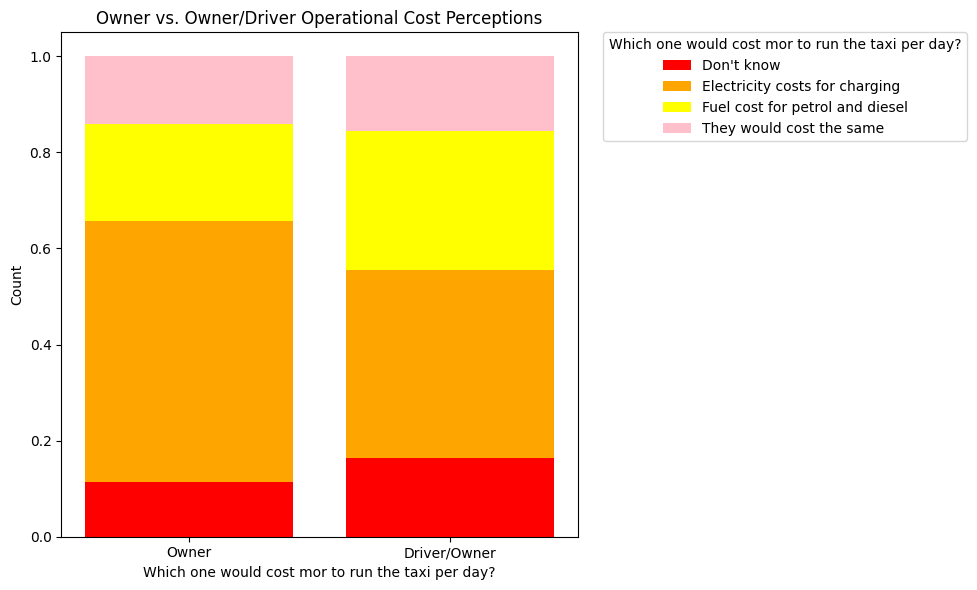

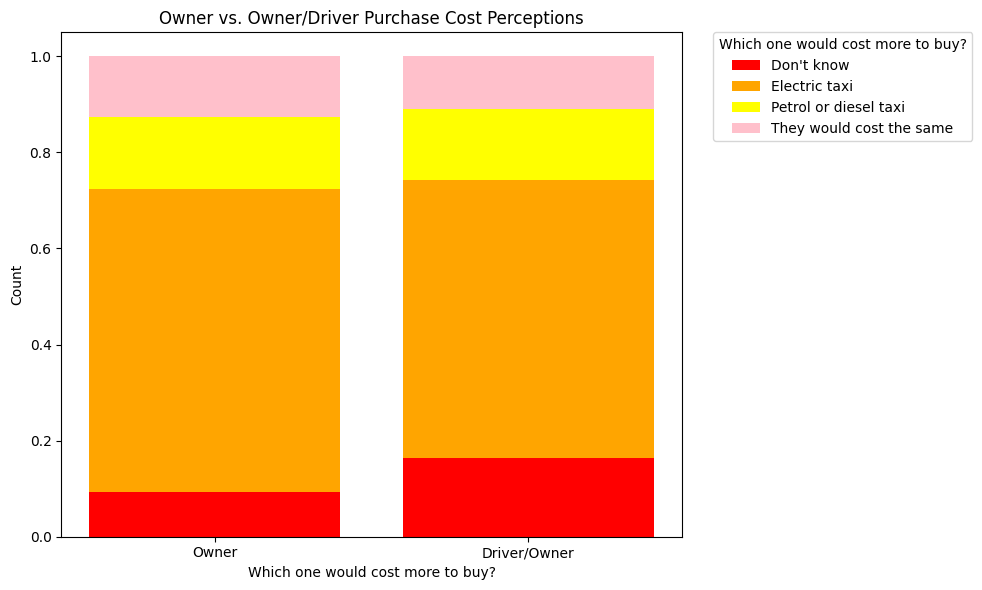

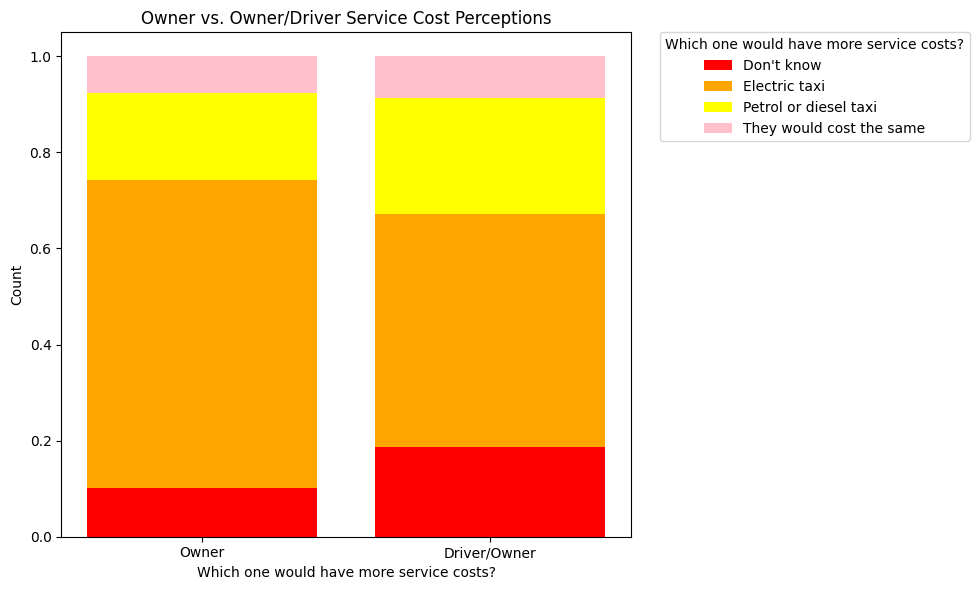

In [489]:
## Direct comparison of what owners and owner/drivers think of operational, purchase, and service costs

owner_op_cost_perceptions = df[owner_perceptions[-3]].value_counts(normalize = True)
owner_driver_op_costs_perceptions = df[owner_driver_perceptions[-3]].value_counts(normalize = True)
op_colors = ['red', 'orange', 'yellow', 'pink']

owner_purchase_cost_perceptions = df[owner_perceptions[-2]].value_counts(normalize = True)
owner_driver_purchase_costs_perceptions = df[owner_driver_perceptions[-2]].value_counts(normalize = True)
purchase_colors = ['red', 'orange', 'yellow', 'pink']

owner_service_cost_perceptions = df[owner_perceptions[-1]].value_counts(normalize = True)
owner_driver_service_costs_perceptions = df[owner_driver_perceptions[-1]].value_counts(normalize = True)
service_colors = ['red', 'orange', 'yellow', 'pink']

reload(taxi_survey)
taxi_survey.plot_cost_perception_comparison(owner_op_cost_perceptions, owner_driver_op_costs_perceptions, op_colors, cost_type = 'Operational', question = 'Which one would cost mor to run the taxi per day?')
taxi_survey.plot_cost_perception_comparison(owner_purchase_cost_perceptions, owner_driver_purchase_costs_perceptions, purchase_colors, cost_type = 'Purchase', question = 'Which one would cost more to buy?')
taxi_survey.plot_cost_perception_comparison(owner_service_cost_perceptions, owner_driver_service_costs_perceptions, service_colors, cost_type = 'Service', question = 'Which one would have more service costs?')

 print('service', round(owner_service_cost_perceptions,2), round(owner_driver_service_costs_perceptions,2), '\n')

print('buy', round(owner_purchase_cost_perceptions,2), round(owner_driver_purchase_costs_perceptions,2), '\n')

print('operate', round(owner_op_cost_perceptions,2), round(owner_driver_op_costs_perceptions, 2))

effect of perception of cost on answers to benefits, risks, and stated prefs

In [382]:
# Effect of cost perception on EV preferences
df[owner_perceptions[-3]].value_counts(normalize = True)

# target variable - mapped to unit interval 
df['owner_stated_prefs_mapping'] = df[owner_questions[-4]].map({'Strongly agree': 1, 'Agree': 1, 'Disagree': 0, 'Strongly Disagree': 0})

# Concat target variable with predictor variables one hot encoded
df_owner_cost_vs_prefs = pd.concat([df['owner_stated_prefs_mapping'], pd.get_dummies(df[owner_perceptions[-3]])], axis = 1) # drop first = true?

df_owner_cost_vs_prefs.dropna(inplace = True)

# Fit logistic regression model
logit_model = sm.Logit(df_owner_cost_vs_prefs['owner_stated_prefs_mapping'], df_owner_cost_vs_prefs.drop('owner_stated_prefs_mapping', axis = 1))

logit_results = logit_model.fit()

print(logit_results.summary())



Optimization terminated successfully.
         Current function value: 0.331719
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     owner_stated_prefs_mapping   No. Observations:                  179
Model:                                  Logit   Df Residuals:                      175
Method:                                   MLE   Df Model:                            3
Date:                        Sat, 11 Mar 2023   Pseudo R-squ.:                 0.01968
Time:                                18:01:23   Log-Likelihood:                -59.378
converged:                               True   LL-Null:                       -60.570
Covariance Type:                    nonrobust   LLR p-value:                    0.4966
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Do

In [385]:
round(pd.crosstab(df['owner_stated_prefs_mapping'], df[owner_perceptions[-3]], normalize = 'index'),2)

Which one would cost more to run the taxi per day?,Don't know,Electricity costs for charging,Fuel cost for petrol and diesel,They would cost the same
owner_stated_prefs_mapping,,,,
0.0,0.05,0.53,0.32,0.11
1.0,0.09,0.47,0.22,0.22


### Concern for climate change 

In [ ]:
pd.crosstab( driver_owner_user, climate_concern, normalize = 'index').plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')

Comparison of d,o,u dummy vars on concern for climate change (boxplot, regressions, ANOVA)

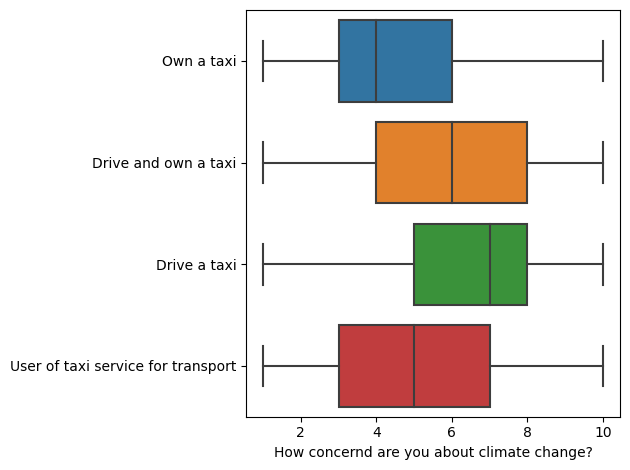

In [313]:

boxplot_df = pd.concat([climate_concern, driver_owner_user], axis = 1)
##f_melt = pd.melt(reg_df.reset_index(), id_vars = ['How concernd are you about climate change?'], value_vars = reg_df.columns[1:])
#df_melt.columns = ['Concern for climate change', 'Status', 'Value']
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/respondent_type_vs_concern.png')
plt.show()

In [ ]:


cat_concern = CategoricalDtype(categories =[1,2,3,4,5,6,7,8,9,10], ordered = True)
climate_concern_cats = climate_concern.astype(cat_concern)
climate_concern_cats.dtype

reg_df = pd.concat([climate_concern, pd.get_dummies(driver_owner_user)], axis = 1)
reg_df.dropna(inplace =True)
reg_df.columns = ['Concern', 'Drive', 'DriveOwn', 'Own', 'Use']
#from statsmodels.miscmodels.ordinal_model import OrderedModel
#mod_prob = OrderedModel(probit_df[probit_df.columns[0]], probit_df[probit_df.columns[1]], distr = 'probit')
# create the regression model
#model = sm.OLS(reg_df[reg_df.columns[0]], reg_df[['Drive a taxi', 'Drive and own a taxi', 'Own a taxi', 'User of taxi service for transport']])
model = ols('Concern ~ Drive + DriveOwn + Own + Use', data = reg_df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)
# fit the model
#results = model.fit()

# print the summary of the regression results
print(anova_table)
t_test = model.t_test("Own = Use")
print(t_test)


ttest = ttest_ind(reg_df[reg_df['Own'] == 1]['Concern'], reg_df[reg_df['Drive'] == 1]['Concern'])
print(ttest)
ttest = ttest_ind(reg_df[reg_df['DriveOwn'] == 1]['Concern'], reg_df[reg_df['Drive'] == 1]['Concern'])
print(ttest)
ttest = ttest_ind(reg_df[reg_df['Own'] == 1]['Concern'], reg_df[reg_df['DriveOwn'] == 1]['Concern'])
print(ttest)


### Risk appetite vs perception of EV risks

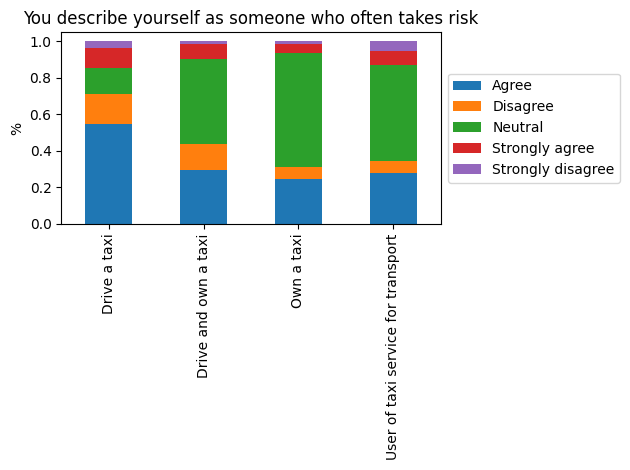

In [597]:
pd.crosstab(driver_owner_user, personal_risk_taker, normalize = 'index').plot(kind = 'bar', stacked = True, title = "You describe yourself as someone who often takes risk")
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.ylabel("%")
plt.xlabel('')
plt.tight_layout()
plt.savefig('figures/respondent_type_vs_risk_appetite.png')
plt.show()

### Length of ownership

In [325]:
exploded_df_driver[driver_questions[0]].value_counts()

4 to 8 yeras        2764
8 to 12 years       2149
1 to 4 years        1478
12 to 16 years      1193
16 to 20 years       522
20 to 24 years       171
Less than 1 year     164
24 to 28 years        84
28 to 32 years        19
32 years or more      17
Name: How long have you been a taxi driver?, dtype: int64

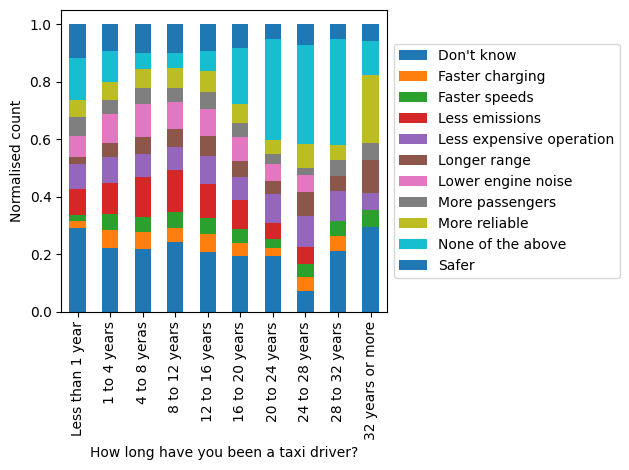

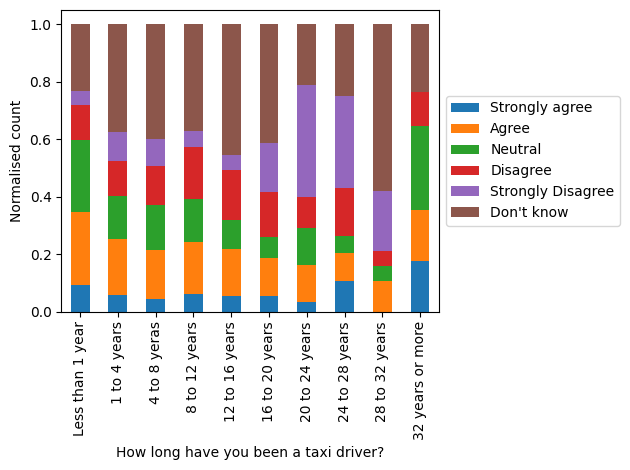

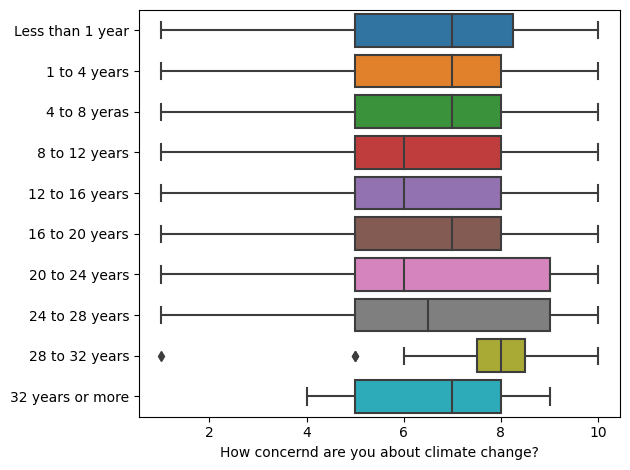

In [488]:
# Driver perceptions
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]


# Indeces for ordering and graph cleanliness
perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

handles = ["Don't know", "Faster charging", "Faster speeds", "Less emissions", "Less expensive operation", "Longer range", "Lower engine noise", "More passengers", "More reliable", "None of the above", "Safer"]
## Plotting 
order_length = ['Less than 1 year', '1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years', '28 to 32 years', '32 years or more']
pd.crosstab(exploded_df_driver[driver_questions[0]], exploded_df_driver['driver_benefits_of_etaxi_exploded'], normalize = 'index').reindex(order_length).plot(kind = 'bar', stacked = True)
plt.legend(labels = handles, bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.ylabel('Normalised count')
plt.tight_layout()
plt.savefig('figures/length_owned_vs_benefits_of_etaxi.png')
plt.show()

order_prefs = [ 'Strongly agree', 'Agree', 'Neutral' , 'Disagree', 'Strongly Disagree', "Don't know"]

pd.crosstab(exploded_df_driver[driver_questions[0]], exploded_df_driver[driver_perceptions[2]], normalize = 'index')[order_prefs].reindex(order_length).plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.ylabel('Normalised count')
plt.tight_layout()
plt.savefig('figures/length_owned_vs_prefers_taxi.png')
plt.show()

# pd.crosstab(exploded_df_driver[driver_questions[0]], exploded_df[climate_change[0]], normalize = 'index').plot(kind = 'bar', stacked = True)
# plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
# plt.show()



boxplot_df = pd.concat([exploded_df_driver[climate_change[0]], exploded_df_driver[driver_questions[0]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_length)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/length_owned_vs_climate_concern.png')
plt.show()


### Income

Driver, owner, and owner/driver income distributions

81


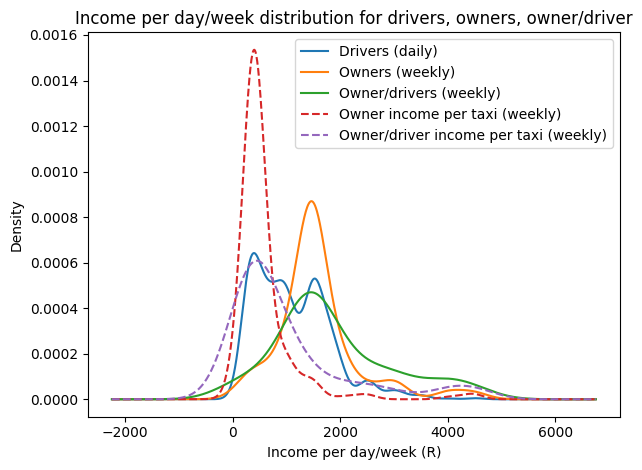

In [345]:
driver_income_cleaned = driver_income_per_day.dropna()
print(len(driver_income_per_day[driver_income_per_day > 5000]))
# Drop values over 0.5e8
driver_income_cleaned = driver_income_cleaned[driver_income_cleaned < 5000]
driver_income_cleaned.plot(kind = 'density', label = 'Drivers (daily)')
#plt.xlabel('Driver income per day (R)')
#plt.savefig('figures/driver_income_per_day_distribution.png')
#plt.show()

owner_income_cleaned = owner_income_per_week.dropna()
# Drop values over 0.5e8
owner_income_cleaned = owner_income_cleaned[(owner_income_cleaned < 5000)]
owner_income_cleaned.plot(kind = 'density', label = 'Owners (weekly)')
#plt.xlabel('Owner income per week (R)')
#plt.savefig('figures/owner_income_per_week_distribution.png')

owner_driver_income_cleaned = owner_driver_income_per_week.dropna()
# Drop values over 0.5e8
owner_driver_income_cleaned = owner_driver_income_cleaned[(owner_driver_income_cleaned < 5000)]
owner_driver_income_cleaned.plot(kind = 'density', label = 'Owner/drivers (weekly)')
#plt.xlabel('Owner income per week (R)')
#plt.savefig('figures/owner_income_per_week_distribution.png')


df_inc_per_taxi = pd.concat([owner_income_per_week, owner_num_taxis], axis = 1)
df_inc_per_taxi = df_inc_per_taxi.dropna()
df_inc_per_taxi.columns = ['owner_income_per_week', 'owner_num_taxis']
df_inc_per_taxi['owner_num_taxis'] = df_inc_per_taxi['owner_num_taxis'].astype(float)
df_inc_per_taxi = df_inc_per_taxi[df_inc_per_taxi['owner_income_per_week'] < 5000]
df_inc_per_taxi.reset_index(inplace = True)
df['owner_income_per_taxi'] = df_inc_per_taxi['owner_income_per_week'] / df_inc_per_taxi['owner_num_taxis']
df['owner_income_per_taxi'].plot(kind = 'density',label = 'Owner income per taxi (weekly)', linestyle = 'dashed')

df_od_inc_per_taxi = pd.concat([owner_driver_income_per_week, owner_driver_num_taxis], axis = 1)
df_od_inc_per_taxi = df_od_inc_per_taxi.dropna()
df_od_inc_per_taxi.columns = ['owner_driver_income_per_week', 'owner_driver_num_taxis']
df_od_inc_per_taxi['owner_driver_num_taxis'] = df_od_inc_per_taxi['owner_driver_num_taxis'].astype(float)
df_od_inc_per_taxi = df_od_inc_per_taxi[df_od_inc_per_taxi['owner_driver_income_per_week'] < 5000]
df_od_inc_per_taxi.reset_index(inplace = True)
df['owner_driver_income_per_taxi'] = df_od_inc_per_taxi['owner_driver_income_per_week'] / df_od_inc_per_taxi['owner_driver_num_taxis']
df['owner_driver_income_per_taxi'].plot(kind = 'density',label = 'Owner/driver income per taxi (weekly)', linestyle = 'dashed')

plt.ylabel('Density')
plt.xlabel('Income per day/week (R)')
plt.legend(loc = 'upper right')
plt.title("Income per day/week distribution for drivers, owners, owner/driver")
plt.tight_layout()
plt.savefig('figures/income_per_day_week_distribution.png')
plt.show()

Owner income divided by number of taxis owned

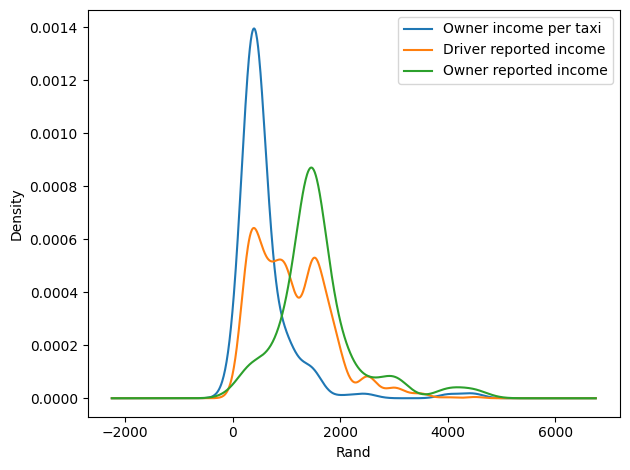

In [329]:


driver_income_cleaned.plot(kind = 'density', label = 'Driver reported income')
owner_income_cleaned.plot(kind = 'density', label = 'Owner reported income')
plt.legend(loc = 'upper right')
plt.ylabel('Density')
plt.xlabel('Rand')
plt.tight_layout()
plt.savefig('figures/income_per_taxi_distribution.png')
plt.show()

#df['owner_income_per_taxi'] = owner_income_per_week / owner_num_taxis


Income by length of time driving taxi

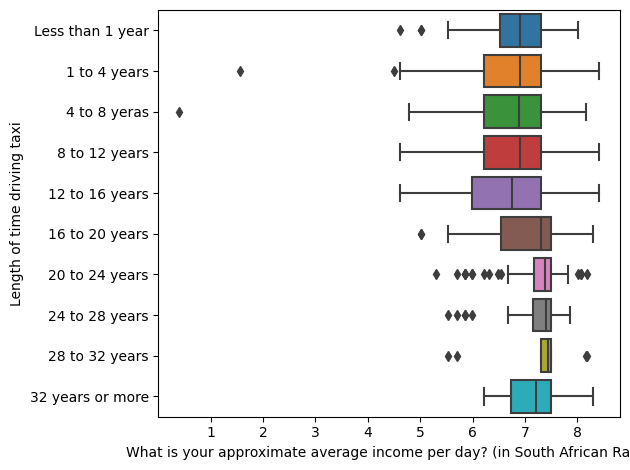

In [186]:


df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]

order_length = ['Less than 1 year', '1 to 4 years', '4 to 8 yeras', '8 to 12 years', '12 to 16 years', '16 to 20 years', '20 to 24 years', '24 to 28 years', '28 to 32 years', '32 years or more']
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[0]]], axis = 1)
##f_melt = pd.melt(reg_df.reset_index(), id_vars = ['How concernd are you about climate change?'], value_vars = reg_df.columns[1:])
#df_melt.columns = ['Concern for climate change', 'Status', 'Value']
boxplot_df[boxplot_df.columns[0]] = np.log(boxplot_df[boxplot_df.columns[0]])
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_length)
plt.ylabel('Length of time driving taxi')
plt.tight_layout()
plt.savefig('figures/length_driving_vs_income.png')
plt.show()

Income by knowledge of e-taxis

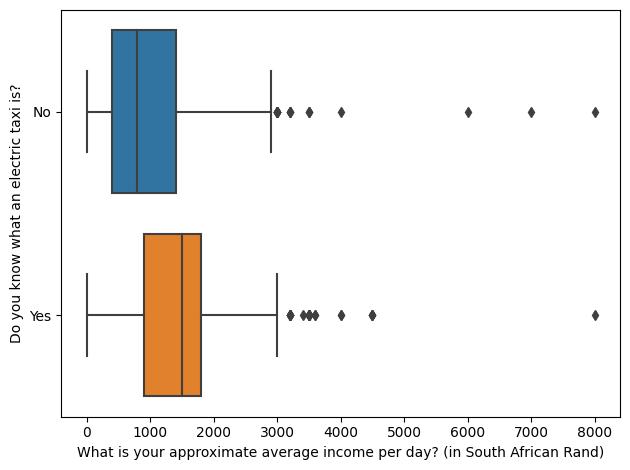

In [188]:

df_cleaned = df[(df[driver_questions[6]] < 10000) & (df[driver_questions[6]].notnull())]

boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[7]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df)
plt.ylabel('Do you know what an electric taxi is?')
plt.tight_layout()
plt.savefig('figures/income_vs_knowledge_of_etaxi.png')
plt.show()

#t-test between the means of the two groups (yes and no)
df_cleaned.groupby(driver_questions[7]).agg({driver_questions[6]: 'mean'})

t_test = ttest_ind(df_cleaned[df_cleaned[driver_questions[7]] == 'Yes'][driver_questions[6]], df_cleaned[df_cleaned[driver_questions[7]] == 'No'][driver_questions[6]])


Income by hours worked per day, km drdiven weekly, and something else i need to check out

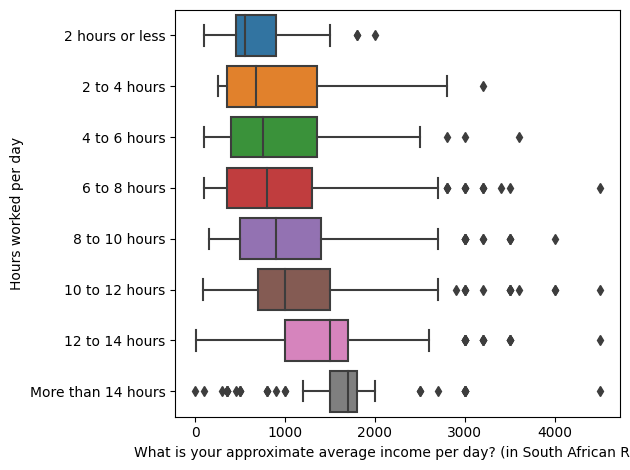

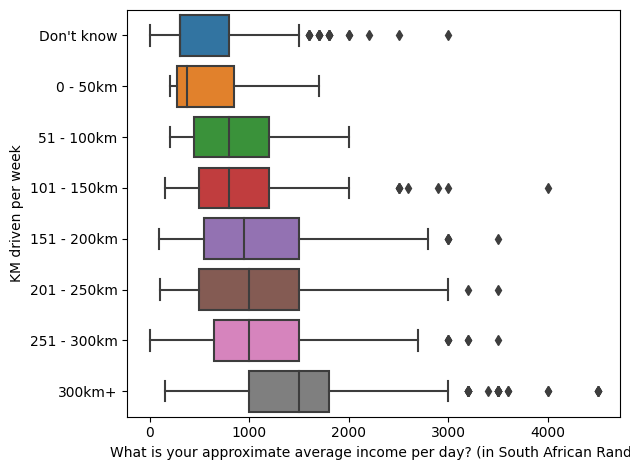

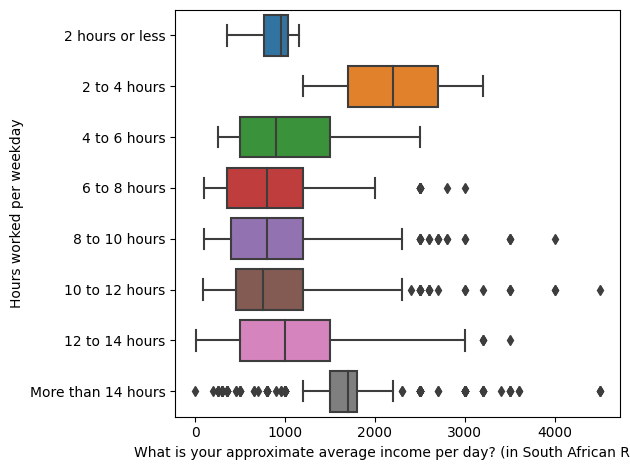

In [401]:

df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]
order_hours = ['2 hours or less', '2 to 4 hours', '4 to 6 hours', '6 to 8 hours', '8 to 10 hours', '10 to 12 hours', '12 to 14 hours', 'More than 14 hours']
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[5]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_hours)
plt.ylabel('Hours worked per day')
plt.tight_layout()
plt.savefig('figures/income_by_hours_worked_weekend.png')
plt.show()

df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]
order_km_weekly = ["Don't know", '0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km+']
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[4]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_km_weekly)
plt.ylabel('KM driven per week')
plt.tight_layout()
plt.savefig('figures/income_by_km_driven.png')
plt.show()


df_cleaned = df[(df[driver_questions[6]] < 5000) & (df[driver_questions[6]].notnull())]
boxplot_df = pd.concat([df_cleaned[driver_questions[6]], df_cleaned[driver_questions[3]]], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = order_hours)
plt.ylabel('Hours worked per weekday')
plt.tight_layout()
plt.savefig('figures/income_by_hours_worked_weekday.png')
plt.show()

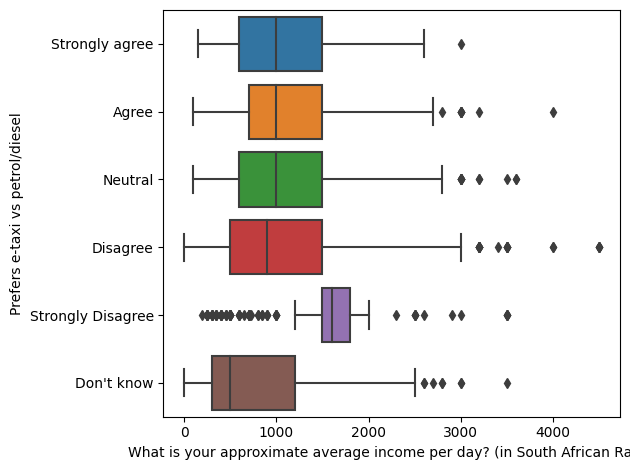

In [60]:
# Income by benefits of e-taxi
# perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
# perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

# df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
# exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
# exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]

# exploded_df_driver_income_cleaned = exploded_df_driver[(exploded_df_driver[driver_questions[6]] < 5000) & (exploded_df_driver[driver_questions[6]].notnull())]

# boxplot_df = pd.concat([exploded_df_driver_income_cleaned[driver_questions[6]], exploded_df_driver_income_cleaned['driver_benefits_of_etaxi_exploded']], axis = 1)
# ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = perceptions) # Use perceptions instead of perceptions_index
# ax.set_yticklabels(perceptions_index)
# plt.ylabel('Benefits of e-taxi vs petrol/diesel')
# plt.tight_layout()
# plt.savefig('figures/income_by_benefits_of_etaxi.png')
# plt.show()

# Income by risks of e-taxi

# perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
# perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', 'Less range', 'None of the above', "Don't know"]
# df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
# exploded_df_driver = df.explode('driver_risks_of_etaxi_exploded')
# exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]

# exploded_df_driver_income_cleaned = exploded_df_driver[(exploded_df_driver[driver_questions[6]] < 5000) & (exploded_df_driver[driver_questions[6]].notnull())]

# boxplot_df = pd.concat([exploded_df_driver_income_cleaned[driver_questions[6]], exploded_df_driver_income_cleaned['driver_risks_of_etaxi_exploded']], axis = 1)
# ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = perceptions_risks) 
# ax.set_yticklabels(perceptions_risks_index)
# plt.ylabel('Risks of e-taxi vs petrol/diesel')
# plt.tight_layout()
# plt.savefig('figures/income_by_risks_of_etaxi.png')
# plt.show()

# Income by prefers e taxi

prefers_order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree', "Don't know"]
df['driver_prefers_etaxi_exploded'] = df[driver_perceptions[2]].str.split(';')
exploded_df_driver = df.explode('driver_prefers_etaxi_exploded')
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_prefers_etaxi_exploded'] != '') & (exploded_df_driver['driver_prefers_etaxi_exploded'].notnull())]

exploded_df_driver_income_cleaned = exploded_df_driver[(exploded_df_driver[driver_questions[6]] < 5000) & (exploded_df_driver[driver_questions[6]].notnull())]

boxplot_df = pd.concat([exploded_df_driver_income_cleaned[driver_questions[6]], exploded_df_driver_income_cleaned['driver_prefers_etaxi_exploded']], axis = 1)
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = prefers_order) 
#ax.set_yticklabels(perceptions_risks_index)
plt.ylabel('Prefers e-taxi vs petrol/diesel')
plt.tight_layout()
plt.savefig('figures/income_by_prefers_etaxi.png')
plt.show()

In [70]:
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
df['driver_risks_of_etaxi_exploded'] =df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode(['driver_benefits_of_etaxi_exploded', 'driver_risks_of_etaxi_exploded'])
exploded_df_driver

ValueError: columns must have matching element counts

In [68]:
# df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
# df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
# exploded_df_driver = df.explode(['driver_benefits_of_etaxi_exploded')
# exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]
# pd.crosstab(exploded_df_driver['driver_benefits_of_etaxi_exploded'], exploded_df_driver[driver_perceptions[1]]).plot(kind = 'bar', stacked = True)

# Explode the dataframe on both 'driver_benefits_of_etaxi_exploded' and 'driver_risks_of_etaxi_exploded' columns
df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
df['driver_risks_of_etaxi_exploded'] =df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode(['driver_benefits_of_etaxi_exploded', 'driver_risks_of_etaxi_exploded'])

# Drop null or empty string rows in either column
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]
exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]

# Plot a cross tab between the two columns as a stacked bar chart
pd.crosstab(exploded_df_driver['driver_benefits_of_etaxi_exploded'], exploded_df_driver['driver_risks_of_etaxi_exploded']).plot(kind='bar', stacked=True)


ValueError: columns must have matching element counts

In [55]:
grouped = boxplot_df.groupby('driver_benefits_of_etaxi_exploded').agg(['count', 'mean']).round()
grouped = grouped.reindex(perceptions)
print(grouped.to_latex())


\begin{tabular}{lrr}
\toprule
{} & \multicolumn{2}{l}{What is your approximate average income per day? (in South African Rand)} \\
{} &                                                                    count &    mean \\
driver\_benefits\_of\_etaxi\_exploded                  &                                                                          &         \\
\midrule
Less expensive to operate                          &                                                483 &   843.0 \\
Less exhaust gasses (less emissions and pollution) &                                                584 &   773.0 \\
Lower engine noise                                 &                                                459 &   723.0 \\
Safer                                              &                                                532 &   923.0 \\
More reliable                                      &                                                398 &   758.0 \\
Faster charging an electric taxi than fil

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_70572/146214712.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(grouped.to_latex())


In [45]:
print(round(boxplot_df.groupby('driver_benefits_of_etaxi_exploded').describe()).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{8}{l}{What is your approximate average income per day? (in South African Rand)} \\
{} &                                                                    count &    mean &    std &    min &     25\% &     50\% &     75\% &     max \\
driver\_benefits\_of\_etaxi\_exploded                  &                                                                          &         &        &        &         &         &         &         \\
\midrule
Don't know                                         &                                              737.0 &  1125.0 &  686.0 &    5.0 &   500.0 &  1000.0 &  1500.0 &  3600.0 \\
Faster charging an electric taxi than filling u... &                                              301.0 &   522.0 &  537.0 &  100.0 &   300.0 &   300.0 &   400.0 &  3500.0 \\
Faster speeds with                                 &                                              297.0 &   522.0 &  542.0 &  100.0 &   300.0 &   300.0

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_70572/4116240527.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(round(boxplot_df.groupby('driver_benefits_of_etaxi_exploded').describe()).to_latex())


<Axes: xlabel='On WEEKDAYS, how many hours do you drive a taxi per day?'>

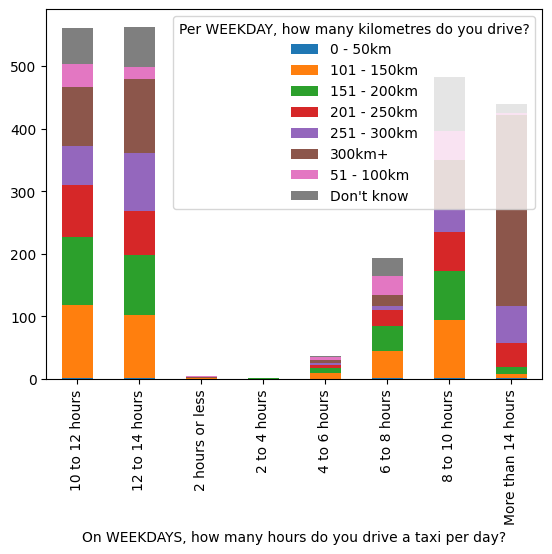

In [406]:
pd.crosstab(df_cleaned[driver_questions[3]], df_cleaned[driver_questions[4]]).plot(kind = 'bar', stacked = True)

###  Education

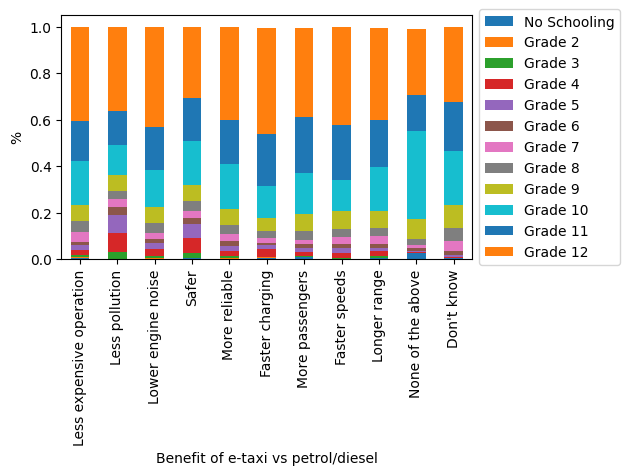

In [97]:
grade_labels = ['No Schooling', 
                'Grade 2 (previously Sub A / class 2)', 
                'Grade 3 (Std. 1)',
                'Grade 4 (Std. 2)', 
                'Grade 5 (Std. 3)',
                'Grade 6 (Std. 4)',
                'Grade 7 (Std. 5)',
                'Grade 8 (Std. 6 / Form 1)',
                'Grade 9 (Std. 7 / Form 2)',
                'Grade 10 (Std. 8 / Form 3)',
                'Grade 11 (Std. 9 / Form 4)',
                'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)']

df['driver_benefits_of_etaxi_exploded'] = df[driver_perceptions[0]].str.split(';')
exploded_df_driver = df.explode('driver_benefits_of_etaxi_exploded')
perceptions = ['Less expensive to operate', 'Less exhaust gasses (less emissions and pollution)', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging an electric taxi than filling up a petrol/diesel taxi', 'More passengers', 'Faster speeds with', 'Longer range', "None of the above", "Don't know"]
perceptions_index = ['Less expensive operation', 'Less pollution', 'Lower engine noise', 'Safer', 'More reliable',  'Faster charging', 'More passengers', 'Faster speeds', 'Longer range', "None of the above", "Don't know"]

exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_benefits_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_benefits_of_etaxi_exploded'].notnull())]
crosstab_df = pd.crosstab(exploded_df_driver['driver_benefits_of_etaxi_exploded'], exploded_df_driver[education[0]], normalize='index')
crosstab_df = crosstab_df.reindex(perceptions)
ax = crosstab_df[grade_labels].plot(kind='bar', stacked=True)

# Set x tick labels
ax.set_xticklabels(perceptions_index)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels = ['No Schooling', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12'])
plt.xlabel('Benefit of e-taxi vs petrol/diesel')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('figures/education_by_benefits.png')
plt.show()

#df['driver_risks_of_etaxi_exploded'] =df[driver_perceptions[1]].str.split(';')

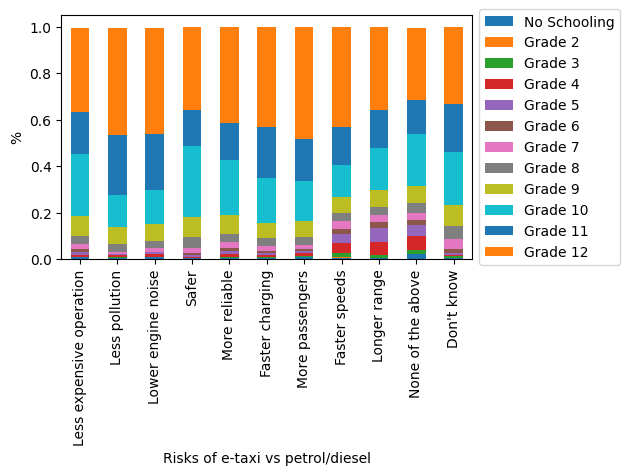

In [103]:
df['driver_risks_of_etaxi_exploded'] = df[driver_perceptions[1]].str.split(';')
exploded_df_driver = df.explode('driver_risks_of_etaxi_exploded')

perceptions_risks = ['More expensive to operate','More pollution and emissions','More noisy', 'More dangerious', 'Less reliable', 'Longer periods of charging an electric taxi than filling with diesel/petrol', 'Fewer passengers','Slower speeds',  'Shorter distances between',   'None of the above', "Don't know"]
perceptions_risks_index = ['More expensive operation', 'More pollution', 'Noisier', 'More dangerous', 'Less reliable','Longer charging', 'Fewer passengers', 'Slower', 'Less range', 'None of the above', "Don't know"]

exploded_df_driver = exploded_df_driver[(exploded_df_driver['driver_risks_of_etaxi_exploded'] != '') & (exploded_df_driver['driver_risks_of_etaxi_exploded'].notnull())]
crosstab_df = pd.crosstab(exploded_df_driver['driver_risks_of_etaxi_exploded'], exploded_df_driver[education[0]], normalize='index')
crosstab_df = crosstab_df.reindex(perceptions_risks)
ax = crosstab_df[grade_labels].plot(kind='bar', stacked=True)

# Set x tick labels
ax.set_xticklabels(perceptions_index)
order_grades = ['No Schooling', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels = order_grades)
plt.xlabel('Risks of e-taxi vs petrol/diesel')
plt.ylabel('%')
plt.tight_layout()
plt.savefig('figures/education_by_risks.png')
plt.show()

In [100]:
education

Index(['What is the highest level of schooling have you succesfully completed or passed?',
       'Have you completed ANY tertiary education?',
       'What education have you received after school?',
       'What is the highest level of tertiary education you have succesfully completed?'],
      dtype='object')

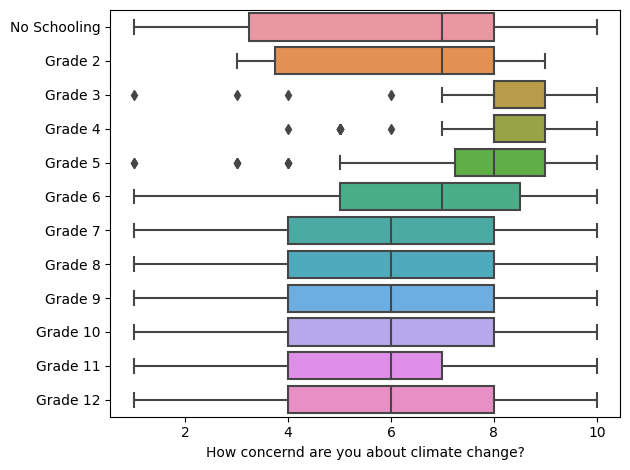

In [105]:
# Edcuation vs risk appetite
# Education vs climate

boxplot_df = pd.concat([climate_concern, df[education[0]]], axis = 1)
##f_melt = pd.melt(reg_df.reset_index(), id_vars = ['How concernd are you about climate change?'], value_vars = reg_df.columns[1:])
#df_melt.columns = ['Concern for climate change', 'Status', 'Value']
ax = sns.boxplot(x = boxplot_df.columns[0], y = boxplot_df.columns[1], data = boxplot_df, order = grade_labels)
ax.set_yticklabels(order_grades)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/education_vs_concern.png')
plt.show()

In [157]:

# Concatenate the data frames
boxplot_df = pd.concat([climate_concern,
                        df[education[0]].replace({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                  'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})],
                        axis=1)

boxplot_df.dropna(inplace = True)
boxplot_df.rename(columns = {"How concernd are you about climate change?":"Climate_Concern", boxplot_df.columns[1]: "Education"}, inplace = True)
boxplot_df = boxplot_df[boxplot_df['Education'] != "Don't know"]
boxplot_df.reset_index(inplace = True)
# Fit the linear regression model
model = smf.ols('Climate_Concern ~ Education', data=boxplot_df).fit()

# Print the summary of the linear regression results
print(model.summary().to_latex())


AttributeError: 'Summary' object has no attribute 'to_latex'

In [179]:
#effect of education on risk appetite

risk_indexed_df = pd.concat([personal_risk_taker.replace({'Strongly agree': 2, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly disagree': 2}),
                        df[education[0]].replace({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                  'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})], axis = 1)
risk_indexed_df.dropna(inplace = True)
risk_indexed_df.rename(columns = {risk_indexed_df.columns[0]:"Risk", risk_indexed_df.columns[1]: "Education"}, inplace = True)
risk_indexed_df.reset_index(inplace = True)
risk_indexed_df = risk_indexed_df[risk_indexed_df['Education'] != "Don't know"]
risk_indexed_df['Education'] = risk_indexed_df['Education'].astype(int)
model = smf.ols('Risk ~ Education', data=risk_indexed_df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0003438
Date:                Thu, 09 Mar 2023   Prob (F-statistic):              0.985
Time:                        14:55:20   Log-Likelihood:                -6960.8
No. Observations:                5289   AIC:                         1.393e+04
Df Residuals:                    5287   BIC:                         1.394e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6462      0.056     11.445      0.0

In [168]:
risk_indexed_df

0      1.0
1      0.0
2      0.0
3      1.0
4      NaN
      ... 
698     11
699     10
700     10
701     11
702     12
Length: 11406, dtype: object

### Driving distance

In [146]:
order = ['0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km+', "Don't know"]
driver_km_per_weekday.value_counts().reindex(order)
owner_km_per_day.value_counts().index
owner_km_dict
owner_driver_km_per_weekday 

NameError: name 'owner_driver_km_per_weekday' is not defined

In [153]:
owner_driver_km_per_weekday = df[owner_driver_questions[10]]
#owner_driver_questions[11]
#owner_driver_km_per_weekday

0         NaN
1      300km+
2         NaN
3         NaN
4         NaN
        ...  
698       NaN
699       NaN
700       NaN
701       NaN
702       NaN
Name: Per WEEKDAY, how many kilometres do you drive?2, Length: 5703, dtype: object

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/709477699.py:35: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


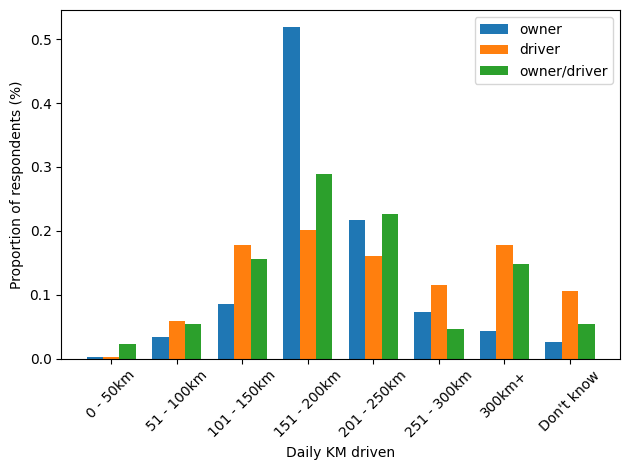

In [155]:
#plot grouped bar chart with owner and driver estimations of daily KM driven
# x = driver_km_per_weekday.value_counts()
# x.rename(index = {'300km+': '300km +'}, inplace = True)
# grouped_km_df = pd.concat([x, owner_km_per_day.value_counts()], axis = 1)
# order = ['0-50km', '50-100km', '101-150km', '150-200km', '201-250km', '250-300km', '300km+', "Don't know"]
width= 0.25
multiplier = 0
# grouped_km_dict = grouped_km_df.to_dict()
order = ['0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km+', "Don't know"]
order2 = ['0 - 50km', '51 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '300km +', "Don't know"]

owner_km_dict = owner_km_per_day.value_counts().reindex(order2).to_dict()
driver_km_dict = driver_km_per_weekday.value_counts().reindex(order).to_dict()
owner_driver_km_dict = owner_driver_km_per_weekday.value_counts().reindex(order).to_dict()

km_dict = {"owner": [val/sum(list(owner_km_dict.values())) for val in list(owner_km_dict.values())], "driver": [val/sum(list(driver_km_dict.values())) for val in list(driver_km_dict.values())], 'owner/driver': [val/sum(list(owner_driver_km_dict.values())) for val in list(owner_driver_km_dict.values())]}


df[owner_driver_questions[10]].value_counts()


x = np.arange(len(order))
fig, ax = plt.subplots(layout = 'constrained')
for respondent, response_counts in km_dict.items():
    offset= width * multiplier
    #rects = ax.bar(distance, count/owner_km_per_day.value_counts().sum(), width, label = respondent)
    rects = ax.bar(x + offset, response_counts, width, label = respondent)
    #ax.bar_label(rects, padding = 3)
    multiplier += 1
    
ax.set_ylabel('Proportion of respondents (%)')
ax.set_xlabel('Daily KM driven')
ax.set_xticks(x + width, order, rotation = 45)
ax.legend()
plt.tight_layout()
plt.savefig('figures/daily_km_driven.png')

/var/folders/pb/drvp7crx7qn3x5331z925m1c0000gt/T/ipykernel_13613/941685946.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order , rotation=45)


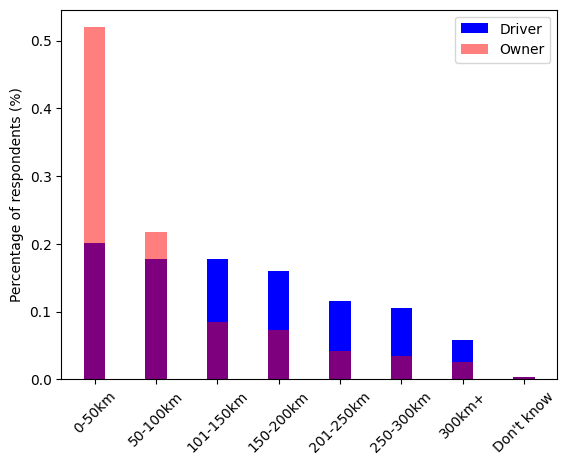

In [60]:
#plot grouped bar chart with owner and driver estimations of daily KM driven
x = driver_km_per_weekday.value_counts()
x.rename(index = {'300km+': '300km +'}, inplace = True)
grouped_km_df = pd.concat([x, owner_km_per_day.value_counts()], axis = 1)
order = ['0 - 50km', '50 - 100km', '101 - 150km', '150 - 200km', '201 - 250km', '250 - 300km', '300km+', "Don't know"]
width= 0.35
multiplier = 0
grouped_km_dict = groupoed_km_df.to_dict()

fig, ax = plt.subplots(layout = 'constrained')
for 
ax.bar(order, driver_km_per_weekday.value_counts().values/driver_km_per_weekday.value_counts().values.sum(), width, color='blue', label='Driver')
ax.bar(order, owner_km_per_day.value_counts().values/owner_km_per_day.value_counts().values.sum(), width, color='red', label='Owner', alpha = 0.5)

ax.set_xticklabels(order , rotation=45)
ax.set_ylabel('Percentage of respondents (%)')
ax.legend()

plt.show()


thnk about the barriers to ev adoption 

# <font color = 'orange'> ToDO: Effect of risk on perception of risks, benefits, and stated preferences <FONT>

In [ ]:
pd.crosstab(exploded_df_driver[climate], exploded_df_driver['driver_benefits_of_etaxi_exploded'], normalize = 'index').plot(kind = 'bar', stacked = True)
plt.legend(bbox_to_anchor = (1.0,0.5), loc = 'center left')
plt.show()

# Explore taxi DOU perceptions